In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


df = pd.read_csv ("c:/users/admin/documents/github/ds7331_project3/gestures data set/allusers.lcl.csv")

In [2]:
df.dtypes

Class      int64
User       int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3        object
Y3        object
Z3        object
X4        object
Y4        object
Z4        object
X5        object
Y5        object
Z5        object
X6        object
Y6        object
Z6        object
X7        object
Y7        object
Z7        object
X8        object
Y8        object
Z8        object
X9        object
Y9        object
Z9        object
X10       object
Y10       object
Z10       object
X11       object
Y11       object
Z11       object
dtype: object

In [3]:
## Lets get rid of that first line which is all zeroes.
df = df[df['Class']!=0]

print(df.head(3))
df.shape

   Class  User         X0         Y0         Z0         X1         Y1  \
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   

          Z1         X2         Y2 ...  Z8 X9 Y9 Z9 X10 Y10 Z10 X11 Y11 Z11  
1 -72.780545  36.621229  81.680557 ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
2 -49.596509  79.223743  43.254091 ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
3 -50.606259  78.451526  43.567403 ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  

[3 rows x 38 columns]


(78095, 38)

In [16]:
## We know there are "?" entries. Let's see how many, for each column

X0_Counts = df['X0'].value_counts()
X1_Counts = df['X1'].value_counts()
X2_Counts = df['X2'].value_counts()
X3_Counts = df['X3'].value_counts()
X4_Counts = df['X4'].value_counts()
X5_Counts = df['X5'].value_counts()
X6_Counts = df['X6'].value_counts()
X7_Counts = df['X7'].value_counts()
X8_Counts = df['X8'].value_counts()
X9_Counts = df['X9'].value_counts()
X10_Counts = df['X10'].value_counts()
X11_Counts = df['X11'].value_counts()

Y0_Counts = df['Y0'].value_counts()
Y1_Counts = df['Y1'].value_counts()
Y2_Counts = df['Y2'].value_counts()
Y3_Counts = df['Y3'].value_counts()
Y4_Counts = df['Y4'].value_counts()
Y5_Counts = df['Y5'].value_counts()
Y6_Counts = df['Y6'].value_counts()
Y7_Counts = df['Y7'].value_counts()
Y8_Counts = df['Y8'].value_counts()
Y9_Counts = df['Y9'].value_counts()
Y10_Counts = df['Y10'].value_counts()
Y11_Counts = df['Y11'].value_counts()



Z0_Counts = df['Z0'].value_counts()
Z1_Counts = df['Z1'].value_counts()
Z2_Counts = df['Z2'].value_counts()
Z3_Counts = df['Z3'].value_counts()
Z4_Counts = df['Z4'].value_counts()
Z5_Counts = df['Z5'].value_counts()
Z6_Counts = df['Z6'].value_counts()
Z7_Counts = df['Z7'].value_counts()
Z8_Counts = df['Z8'].value_counts()
Z9_Counts = df['Z9'].value_counts()
Z10_Counts = df['Z10'].value_counts()
Z11_Counts = df['Z11'].value_counts()

### I printed out the "_Counts" variable results one by one and recorded them to get the following results:
####  For "?" entries in the X coordinates: X0 - none; X1 - none; X2 - none; X3 - 690; X4 - 3120; X5 - 13023; X6 - 25848; X7 - 39152; X8 - 47532; X9 - 54128; X10 - 63343; X11 - 78064 
#### For "?" entries in the Y coordinates: Y0 - none; Y1 - none; Y2 - none; Y3 - 690; Y4 - 3120; Y5 - 13023; Y6 - 25848; Y7 - 39152; Y8 - 47532; Y9 - 54128; Y10 - 63343; Y11 - 78064 
#### For "?" entries in the Z coordinates: Z0 - none; Z1 - none; Z2 - none; Z3 - 690; Z4 - 3120; Z5 - 13023; Z6 - 25848; Z7 - 39152; Z8 - 47532; Z9 - 54128; Z10 - 63343; Z11 - 78064 

In [18]:
## I want to make a graph of these values. 
## Start by combining the numbers of "?" into pandas data frame that lists counts according to X, Y, and Z.

data = [{0:0, 1:0, 2:0, 3:640, 4:3120, 5:13023, 6:25848, 7:39152, 8:72532, 9:54128, 10:63343, 11:78064}, {0:0, 1:0, 2:0, 3:640, 4:3120, 5:13023, 6:25848, 7:39152, 8:72532, 9:54128, 10:63343, 11:78064}, {0:0, 1:0, 2:0, 3:640, 4:3120, 5:13023, 6:25848, 7:39152, 8:72532, 9:54128, 10:63343, 11:78064}]

df_hidden_values = pd.DataFrame(data, index=["X", "Y", "Z"])

print(df_hidden_values)

   0   1   2    3     4      5      6      7      8      9      10     11
X   0   0   0  640  3120  13023  25848  39152  72532  54128  63343  78064
Y   0   0   0  640  3120  13023  25848  39152  72532  54128  63343  78064
Z   0   0   0  640  3120  13023  25848  39152  72532  54128  63343  78064


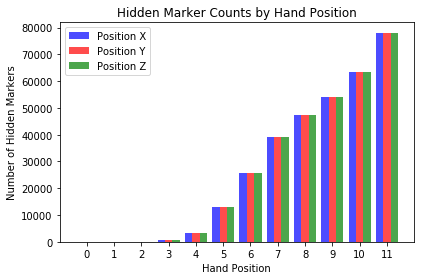

Figure(432x288)


In [20]:
## graph the hidden values table

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 12

X = (0, 0, 0, 640, 3120, 13023, 25848, 39152, 47532, 54128, 63343, 78064)
Y = (0, 0, 0, 640, 3120, 13023, 25848, 39152, 47532, 54128, 63343, 78064)
Z = (0, 0, 0, 640, 3120, 13023, 25848, 39152, 47532, 54128, 63343, 78064)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.27

opacity = 0.7
#error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, X, bar_width,
                alpha=opacity, color='b',
                label='Position X')

rects2 = ax.bar(index + bar_width, Y, bar_width,
                alpha=opacity, color='r',
                label='Position Y')

rects3 = ax.bar(index + bar_width + bar_width, Z, bar_width,
                alpha=opacity, color='g',
                label='Position Z')

ax.set_xlabel('Hand Position')
ax.set_ylabel('Number of Hidden Markers')
ax.set_title('Hidden Marker Counts by Hand Position')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'))
ax.legend()

fig.tight_layout()
plt.show()

print(fig)

In [4]:
## Lets get rid of the ? entries by replacing with 0's

df.replace( {'?': 0}, regex=False,inplace=True)

In [5]:
df.dtypes

Class      int64
User       int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3        object
Y3        object
Z3        object
X4        object
Y4        object
Z4        object
X5        object
Y5        object
Z5        object
X6        object
Y6        object
Z6        object
X7        object
Y7        object
Z7        object
X8        object
Y8        object
Z8        object
X9        object
Y9        object
Z9        object
X10       object
Y10       object
Z10       object
X11       object
Y11       object
Z11       object
dtype: object

In [7]:
df.X3.dtypes

## As expected, just replacing a character with a numeric character didn't change the data type.
## So need to do that explicitly, in next code block.

dtype('O')

In [8]:
## Now, lets make each variable class float64

df['X3'] = pd.to_numeric(df['X3'])
df['X4'] = pd.to_numeric(df['X4'])
df['X5'] = pd.to_numeric(df['X5'])
df['X6'] = pd.to_numeric(df['X6'])
df['X7'] = pd.to_numeric(df['X7'])
df['X8'] = pd.to_numeric(df['X8'])
df['X9'] = pd.to_numeric(df['X9'])
df['X10'] = pd.to_numeric(df['X10'])
df['X11'] = pd.to_numeric(df['X11'])

df['Y3'] = pd.to_numeric(df['Y3'])
df['Y4'] = pd.to_numeric(df['Y4'])
df['Y5'] = pd.to_numeric(df['Y5'])
df['Y6'] = pd.to_numeric(df['Y6'])
df['Y7'] = pd.to_numeric(df['Y7'])
df['Y8'] = pd.to_numeric(df['Y8'])
df['Y9'] = pd.to_numeric(df['Y9'])
df['Y10'] = pd.to_numeric(df['Y10'])
df['Y11'] = pd.to_numeric(df['Y11'])

df['Z3'] = pd.to_numeric(df['Z3'])
df['Z4'] = pd.to_numeric(df['Z4'])
df['Z5'] = pd.to_numeric(df['Z5'])
df['Z6'] = pd.to_numeric(df['Z6'])
df['Z7'] = pd.to_numeric(df['Z7'])
df['Z8'] = pd.to_numeric(df['Z8'])
df['Z9'] = pd.to_numeric(df['Z9'])
df['Z10'] = pd.to_numeric(df['Z10'])
df['Z11'] = pd.to_numeric(df['Z11'])

In [9]:
df.dtypes

Class      int64
User       int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3       float64
Y3       float64
Z3       float64
X4       float64
Y4       float64
Z4       float64
X5       float64
Y5       float64
Z5       float64
X6       float64
Y6       float64
Z6       float64
X7       float64
Y7       float64
Z7       float64
X8       float64
Y8       float64
Z8       float64
X9       float64
Y9       float64
Z9       float64
X10      float64
Y10      float64
Z10      float64
X11      float64
Y11      float64
Z11      float64
dtype: object

In [13]:
## Now that everything is numeric, we can progress further to look at the data.

print(df.head())
print(df.shape)


   Class  User         X0         Y0         Z0         X1         Y1  \
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   
5      1     0  55.142401  71.435607 -64.177303  36.175818  81.556874   

          Z1         X2         Y2 ...    Z8   X9   Y9   Z9  X10  Y10  Z10  \
1 -72.780545  36.621229  81.680557 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 -49.596509  79.223743  43.254091 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3 -50.606259  78.451526  43.567403 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4 -52.752784  86.320630  68.214645 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5 -53.475747  76.986143  42.426849 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   X11  Y11  Z11  
1  0.0  0.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  0.0  0.0  0.0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78095 entries, 1 to 78095
Data columns (total 38 columns):
Class    78095 non-null int64
User     78095 non-null int64
X0       78095 non-null float64
Y0       78095 non-null float64
Z0       78095 non-null float64
X1       78095 non-null float64
Y1       78095 non-null float64
Z1       78095 non-null float64
X2       78095 non-null float64
Y2       78095 non-null float64
Z2       78095 non-null float64
X3       78095 non-null float64
Y3       78095 non-null float64
Z3       78095 non-null float64
X4       78095 non-null float64
Y4       78095 non-null float64
Z4       78095 non-null float64
X5       78095 non-null float64
Y5       78095 non-null float64
Z5       78095 non-null float64
X6       78095 non-null float64
Y6       78095 non-null float64
Z6       78095 non-null float64
X7       78095 non-null float64
Y7       78095 non-null float64
Z7       78095 non-null float64
X8       78095 non-null float64
Y8       78095 non-null float64

In [15]:
## This is supposed to identify missing values. The results state there aren't any.

df.isnull().sum()

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
X5       0
Y5       0
Z5       0
X6       0
Y6       0
Z6       0
X7       0
Y7       0
Z7       0
X8       0
Y8       0
Z8       0
X9       0
Y9       0
Z9       0
X10      0
Y10      0
Z10      0
X11      0
Y11      0
Z11      0
dtype: int64

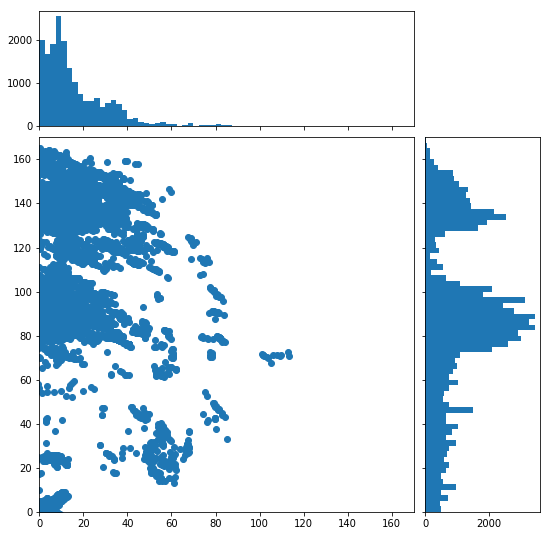

In [23]:
## What does a scatter plot of X and Y, or Y and Z show?
## This code does scatter plot with histograms at edges.
## First, Y versus X, and then Y versus Z in next cell.

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

x = df.Z0
y= df.Y0

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 2.5
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((0, lim))
axScatter.set_ylim((0, lim))

bins = np.arange(0, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

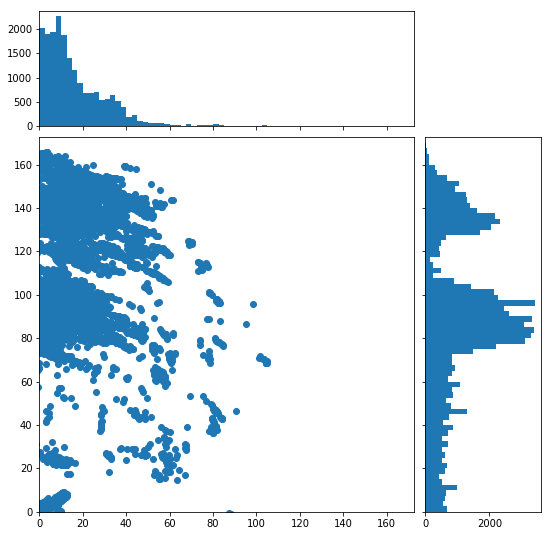

In [24]:
## This plot is Y versus Z

from matplotlib.ticker import NullFormatter

x = df.Z1
y= df.Y1

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 2.5
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((0, lim))
axScatter.set_ylim((0, lim))

bins = np.arange(0, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

#### Plots are similar but not identical, as expected. These are just for X0, Y0, and Z0. Doing this for the other 30 columns would be too much. I'll find another way to visualize the relationships among the different variables and do it by User number and by Position (Class).

In [26]:
## Now, lets subset by Class (position of the hand, or gesture)
## Create subset for each value of Class: as df.class1, df.class2, df.class3, df.class4, df.class5

df_class1 = df[df.Class == 1]
df_class2 = df[df.Class == 2]
df_class3 = df[df.Class == 3]
df_class4 = df[df.Class == 4]
df_class5 = df[df.Class == 5]

print(df_class1.shape, df_class2.shape, df_class3.shape, df_class4.shape, df_class5.shape)

(16265, 38) (14978, 38) (16344, 38) (14775, 38) (15733, 38)


#### When I add up the row numbers (16265 + 14978 + 16344 + 14775 + 15733) I get a total of 78135, which is 40 rows in excess of the original 78095 shown above. I haven't figured out why this is.
#### With subsetted datasets according to individual persons (Class), my next step is to examine data within each data subset. Begin by looking at distributions with histograms, using X0 ,Y0.

(array([1.010e+02, 7.330e+02, 3.063e+03, 4.153e+03, 4.574e+03, 3.629e+03,
        1.000e+01, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-62.8144193 , -37.53119384, -12.24796839,  13.03525707,
         38.31848253,  63.60170798,  88.88493344, 114.1681589 ,
        139.45138435, 164.73460981, 190.01783527]),
 <a list of 10 Patch objects>)

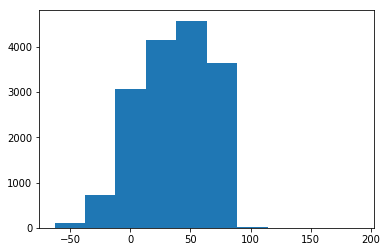

In [27]:
import matplotlib as plt

plt.pyplot.hist(df_class1.X0)

(array([2.000e+00, 1.000e+01, 2.500e+01, 5.130e+02, 1.879e+03, 2.660e+03,
        5.064e+03, 3.480e+03, 1.232e+03, 1.130e+02]),
 array([-108.55273845,  -83.25429076,  -57.95584306,  -32.65739536,
          -7.35894766,   17.93950004,   43.23794774,   68.53639544,
          93.83484313,  119.13329083,  144.43173853]),
 <a list of 10 Patch objects>)

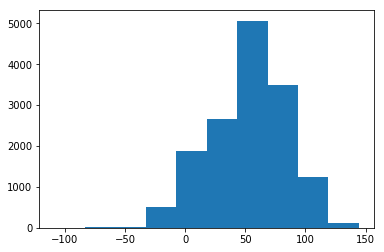

In [28]:
plt.pyplot.hist(df_class2.X0)

(array([  53.,  605.,  892.,  998., 2776., 5284., 3452., 1588.,  676.,
          20.]), array([-45.13978175, -25.46740155,  -5.79502135,  13.87735885,
         33.54973905,  53.22211925,  72.89449945,  92.56687965,
        112.23925985, 131.91164005, 151.58402025]), <a list of 10 Patch objects>)

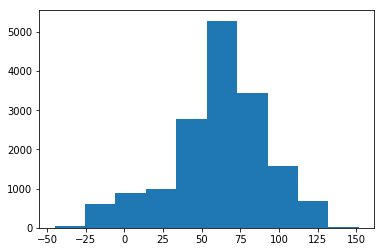

In [29]:
plt.pyplot.hist(df_class3.X0)

(array([5.000e+00, 1.000e+00, 1.400e+01, 8.720e+02, 1.743e+03, 4.215e+03,
        4.970e+03, 1.778e+03, 1.065e+03, 1.120e+02]),
 array([-96.56882929, -71.7533429 , -46.93785651, -22.12237012,
          2.69311626,  27.50860265,  52.32408904,  77.13957543,
        101.95506182, 126.77054821, 151.58603459]),
 <a list of 10 Patch objects>)

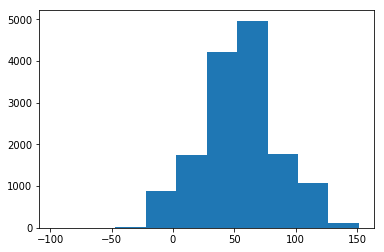

In [30]:
plt.pyplot.hist(df_class4.X0)

(array([ 523., 1415., 1677., 2198., 3966., 3226., 2028.,  566.,  127.,
           7.]), array([-44.24946661, -23.4915359 ,  -2.7336052 ,  18.02432551,
         38.78225621,  59.54018692,  80.29811763, 101.05604833,
        121.81397904, 142.57190974, 163.32984045]), <a list of 10 Patch objects>)

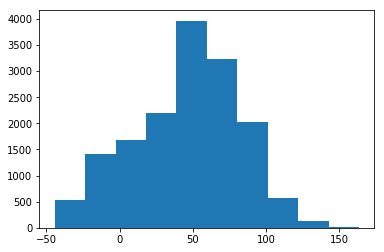

In [31]:
plt.pyplot.hist(df_class5.X0)

(array([6.000e+00, 1.500e+01, 1.500e+01, 5.640e+02, 1.032e+03, 1.741e+03,
        6.226e+03, 6.629e+03, 1.600e+01, 2.100e+01]),
 array([-98.23375643, -73.02132866, -47.80890089, -22.59647312,
          2.61595465,  27.82838242,  53.04081019,  78.25323796,
        103.46566573, 128.6780935 , 153.89052127]),
 <a list of 10 Patch objects>)

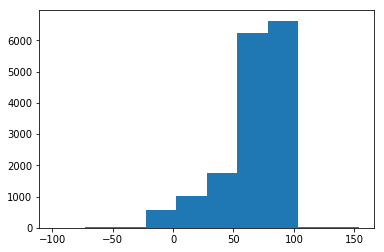

In [32]:
plt.pyplot.hist(df_class1.Y0)

(array([  16.,   24.,   39.,  369.,  841.,  969., 5402., 1601., 3615.,
        2102.]), array([-67.15790442, -43.52456761, -19.8912308 ,   3.74210601,
         27.37544282,  51.00877963,  74.64211644,  98.27545325,
        121.90879006, 145.54212687, 169.17546367]), <a list of 10 Patch objects>)

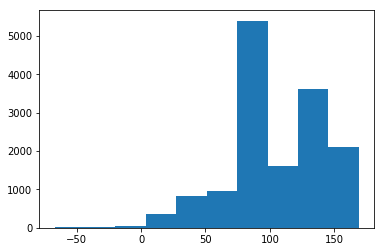

In [33]:
plt.pyplot.hist(df_class2.Y0)

(array([  18.,   16.,  375., 1533., 1757., 1422., 3595., 2619., 1868.,
        3141.]), array([-61.32474982, -40.07604116, -18.82733249,   2.42137617,
         23.67008483,  44.91879349,  66.16750215,  87.41621082,
        108.66491948, 129.91362814, 151.1623368 ]), <a list of 10 Patch objects>)

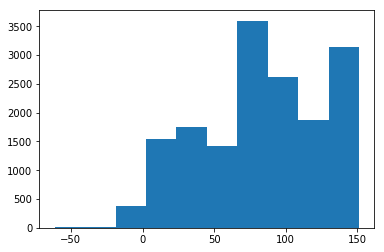

In [34]:
plt.pyplot.hist(df_class3.Y0)

(array([   4.,   50.,  263.,  999., 1395., 1350., 3854., 1768., 2287.,
        2805.]), array([-72.40196719, -48.49579381, -24.58962044,  -0.68344706,
         23.22272632,  47.12889969,  71.03507307,  94.94124645,
        118.84741983, 142.7535932 , 166.65976658]), <a list of 10 Patch objects>)

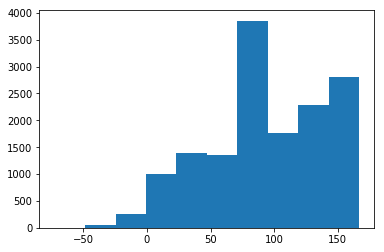

In [35]:
plt.pyplot.hist(df_class4.Y0)

(array([ 726., 1033., 1479.,  822., 1061., 2906., 3801.,  620., 2324.,
         961.]), array([ -6.56765112,   9.56065931,  25.68896974,  41.81728017,
         57.94559059,  74.07390102,  90.20221145, 106.33052188,
        122.45883231, 138.58714274, 154.71545317]), <a list of 10 Patch objects>)

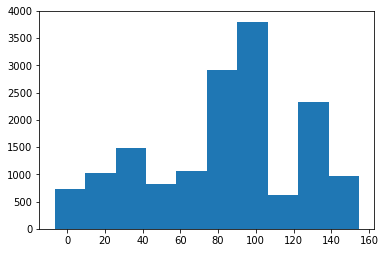

In [36]:
plt.pyplot.hist(df_class5.Y0)

### These histograms illustrate that the X0 variable and the Y0 variable are distributed quite differently among the 5 Classes. The Classes represent 5 different hand postures, namely 1) Fist, 2) Stop, 3) Pointing with One Finger, 4) Pointing with Two Fingers, 5) Grabbing. There are 12 different individuals doing the positions, indicated as 0 through 11. And the position of the markers are given by X, Y, and Z. The most obvious variability is in the Y0 variable, (which is the Y coordinate of person 0 during the first gesture ??).

In [38]:
## Now, Subset eacj df.class_ by the User number.

df_class1_user = df_class1.groupby(by="User")
df_class2_user = df_class2.groupby(by="User")
df_class3_user = df_class3.groupby(by="User")
df_class4_user = df_class4.groupby(by="User")
df_class5_user = df_class5.groupby(by="User")

In [39]:
df_class1_user[['X0', 'X1', 'X2', 'X9', 'X10', 'X11']].head()

,X0,X1,X2,X9,X10,X11
1,54.263880,76.895635,36.621229,0.0,0.0,0.0
2,56.527558,39.135978,79.223743,0.0,0.0,0.0
3,55.849928,37.988804,78.451526,0.0,0.0,0.0
4,55.329647,36.561863,86.320630,0.0,0.0,0.0
5,55.142401,36.175818,76.986143,0.0,0.0,0.0
9049,29.699315,10.640074,53.356216,0.0,0.0,0.0
9050,29.744358,10.739796,53.374626,0.0,0.0,0.0
9051,29.713936,10.628119,53.496711,0.0,0.0,0.0
9052,29.712018,10.550590,53.672679,0.0,0.0,0.0
9053,30.430470,10.997782,54.588424,0.0,0.0,0.0


#### This is bit hard to grasp at first, but this output shows the first five rows for each of the 14 Users in the Class 1. Not a lot to see here, except that subsetting has gone well.

### At this point I have the dataframe subsetted into five new dataframes according to the 5 hand gestures (Class 1 through 5). I have plotted the distributions of X0 and Y0  for each hand gesture (Class) as histograms to see that there is variability by Class, so different hand gestures have different results. I have grouped each subsetted dataframe according to User (1 - 14) and done summary stats for Class 1 Users on X0 to see that my subsetting worked. I have a pandas dataframe of the counts of "?" values for each of the 11 positions, and graphed this to show the values are identical within each position for the X0, Y0, and Z0 coordinate values, so the "missing" (i.e. "hidden marker" data) entries are equal. I have made certain that the "?" entries are replaced with NaN entries, but still have "?" entries when data are "described", instead of "NaN" entries.  I have not gone further with the subsets, especially I have not otherwise looked at Users within the classes. I'm going to work on that now.

In [72]:
df_class1_user.Z11.describe()

,count,mean,std,min,25%,50%,75%,max
User,,,,,,,,
0,1872.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1307.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1198.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,820.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,738.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1097.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,653.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Looking at summary indices for all Users within all the columns: In the Class 1 users, I find that columns X11, Y11, and Z11 have no values. The above code is from Z11 and is representative. For Class 2 all columns have data for at least one User. For Class 3, columns 9, 10, and 11 (X, Y, and Z for each number) have no values. For Class 4, columns 10 and 11 (X, Y, and Z for each number) have no values. For Class 5, columns 11 ((X, Y, and Z) have no values .

###  Class 1: Mean values of all X, Y, and Z, sorted by User.

In [106]:
## This code creates three dataframes PER USER (for example, df_class1_usermeans_X, df_class1_usermeans_Y, df_class1_usermeans_Z) 
## of the mean values PER USER of all X, Y, and Z columns, respectively, for Class 1, Class 2, Class 3, Class 4, and Class 5.

## CLASS 1
df_class1_usermeans_X = df_class1_user["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11"].mean()
df_class1_usermeans_Y = df_class1_user["Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11"].mean()
df_class1_usermeans_Z = df_class1_user["Z0", "Z1", "Z2", "Z3", "Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11"].mean()

## CLASS 2
df_class2_usermeans_X = df_class2_user["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11"].mean()
df_class2_usermeans_Y = df_class2_user["Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11"].mean()
df_class2_usermeans_Z = df_class2_user["Z0", "Z1", "Z2", "Z3", "Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11"].mean()

## CLASS 3
df_class3_usermeans_X = df_class3_user["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11"].mean()
df_class3_usermeans_Y = df_class3_user["Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11"].mean()
df_class3_usermeans_Z = df_class3_user["Z0", "Z1", "Z2", "Z3", "Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11"].mean()

## CLASS 4
df_class4_usermeans_X = df_class4_user["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11"].mean()
df_class4_usermeans_Y = df_class4_user["Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11"].mean()
df_class4_usermeans_Z = df_class4_user["Z0", "Z1", "Z2", "Z3", "Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11"].mean()

## CLASS 5
df_class5_usermeans_X = df_class5_user["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11"].mean()
df_class5_usermeans_Y = df_class5_user["Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11"].mean()
df_class5_usermeans_Z = df_class5_user["Z0", "Z1", "Z2", "Z3", "Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11"].mean()

## PRINT FUNCTION TO PRINT ANY OF THE ABOVE DATAFRAMES OF MEANS
print(df_class1_usermeans_X)

             X0         X1         X2         X3         X4         X5  \
User                                                                     
0     56.371346  54.391261  59.877656  51.327883  34.945215  11.487756   
1     18.094432  23.179361  30.978753  37.467392  35.989597   0.675050   
2     42.554587  51.831773  52.356208  51.825285  64.492513   0.000000   
4     40.556800  38.336837  29.153094  16.647445   3.674775   0.000000   
5     34.642742  34.153701  23.250487  15.664818  18.768805   9.999250   
6     58.381642  52.922518  48.852316  42.319871  39.788827  42.235900   
7     63.059869  61.141669  44.269124  36.249658  28.745651  13.898175   
8     44.963518  44.728965  45.523542  48.623084  53.443442  54.368400   
9     53.364789  50.050467  43.629451  44.702068  40.169279  37.828091   
10    38.241169  50.560644  47.972243  46.855086  40.905249  29.489669   
11    37.340651  46.898929  51.764148  51.547113  52.096624  50.053325   
12    22.940836  25.837883  34.741412 

In [94]:
## This code creates three dataframes (df_class1_usermeans_X, df_class1_usermeans_Y, df_class1_usermeans_Z) 
## of the mean values by user of all X, Y, and Z columns, respectively, for Class 1.

#df_class1_user = df_class1.groupby(by="User")
df_Means1 = df_class1.groupby("User").mean()
print(df_Means1)
df_Means2 = df_class2.groupby("User").mean()
#print(df_Means1)
df_Means3 = df_class3.groupby("User").mean()
#print(df_Means1)
df_Means4 = df_class4.groupby("User").mean()
#print(df_Means1)
df_Means5 = df_class5.groupby("User").mean()
#print(df_Means1)

      Class         X0         Y0         Z0         X1         Y1         Z1  \
User                                                                            
0         1  56.371346  56.153892 -61.762616  54.391261  61.284399 -60.031254   
1         1  18.094432  80.194128 -48.344732  23.179361  79.330059 -49.787883   
2         1  42.554587  71.926847 -56.369645  51.831773  68.296997 -59.440151   
4         1  40.556800  53.616208 -60.461779  38.336837  48.026659 -65.091575   
5         1  34.642742  93.928915   1.754251  34.153701  95.598845   4.053762   
6         1  58.381642  52.664703 -45.898019  52.922518  56.345120 -44.961758   
7         1  63.059869  32.122283 -45.490129  61.141669  31.741070 -47.453920   
8         1  44.963518  53.560303 -52.068830  44.728965  52.283545 -53.770344   
9         1  53.364789  56.345136 -60.512363  50.050467  56.836154 -60.463720   
10        1  38.241169  57.647021 -66.545753  50.560644  52.452239 -73.540730   
11        1  37.340651  85.9

In [93]:
#print(df_Means1) prints the mean values for each User in Class 1, all X, Y, and Z columns

### The above cells are 2 different ways of creating dataframes of the mean values per user within each Class. One has seperate dataframes for X, Y, and Z values per Class. The second has means of all X, Y, and Z in each Class. Can choose whichever set of dataframes is more convenient for looking at graphs.

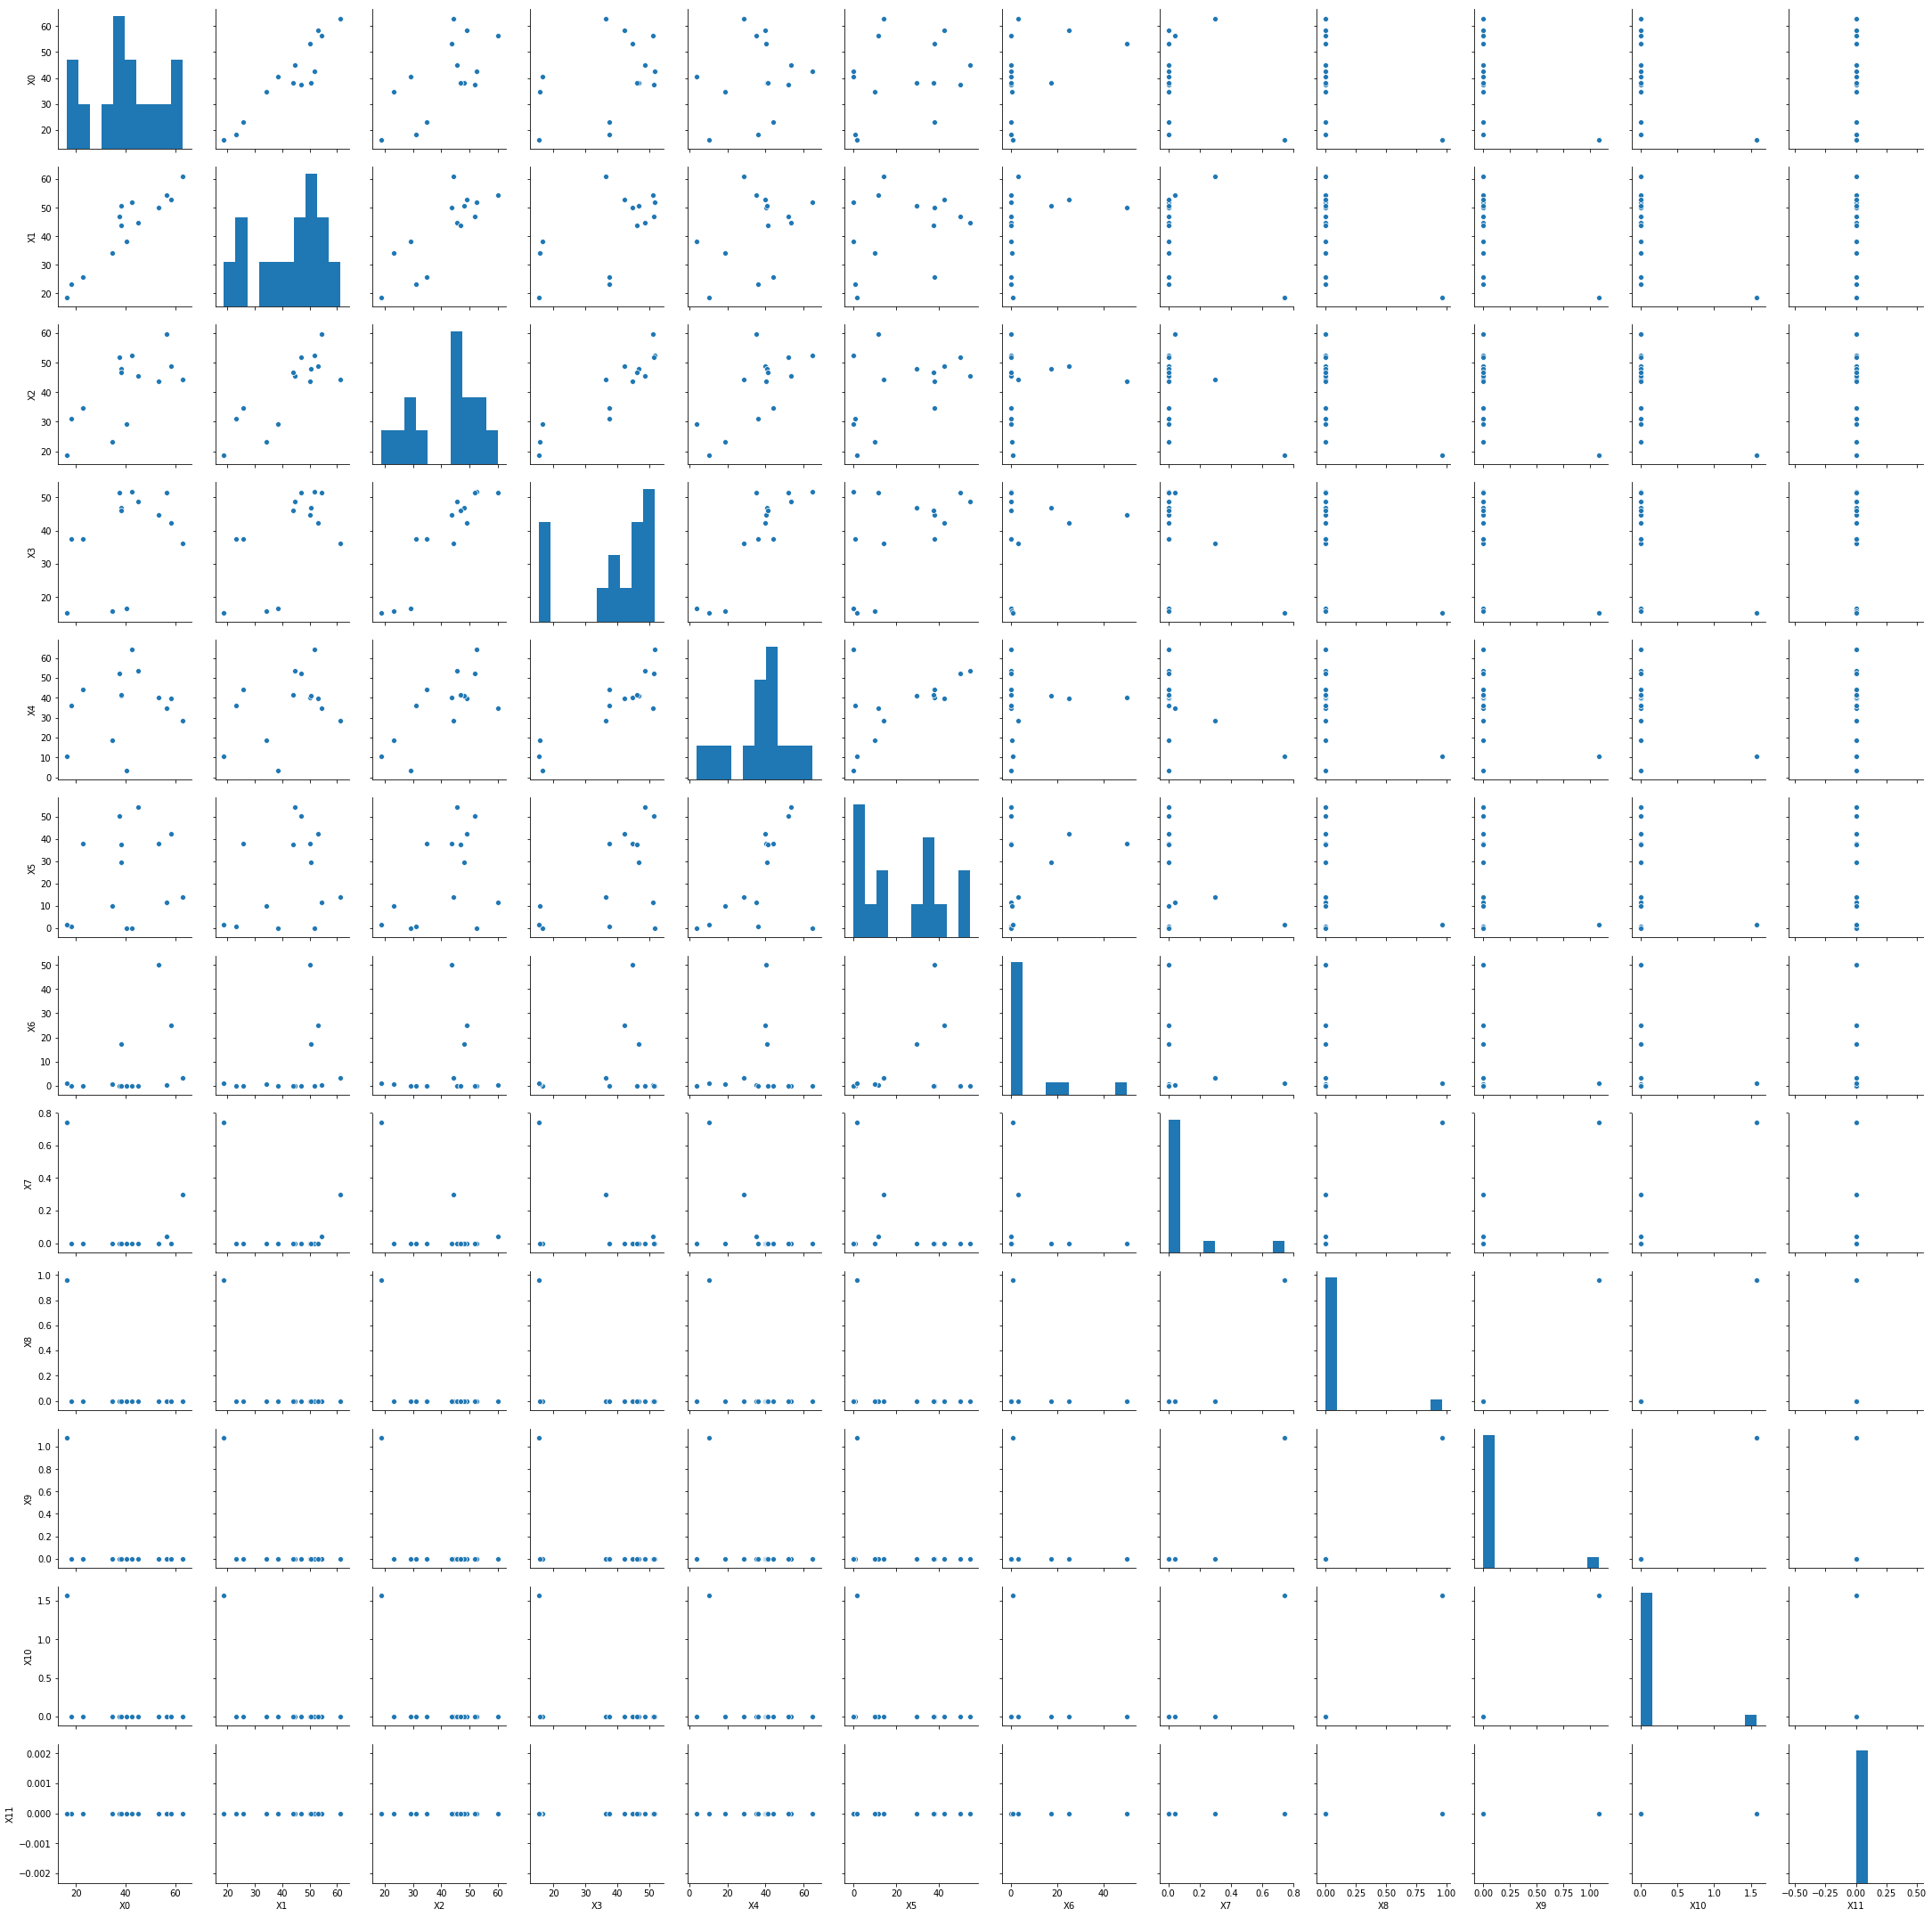

In [95]:
## Using Seaborn, create Pair Plots of means of each set of X, Y, and Z means for each Class.
## Starting with Class 1, X column means, then Y column means, then Z column means.

import seaborn as sns
sns.pairplot(df_class1_usermeans_X, vars = ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11"], dropna = True)

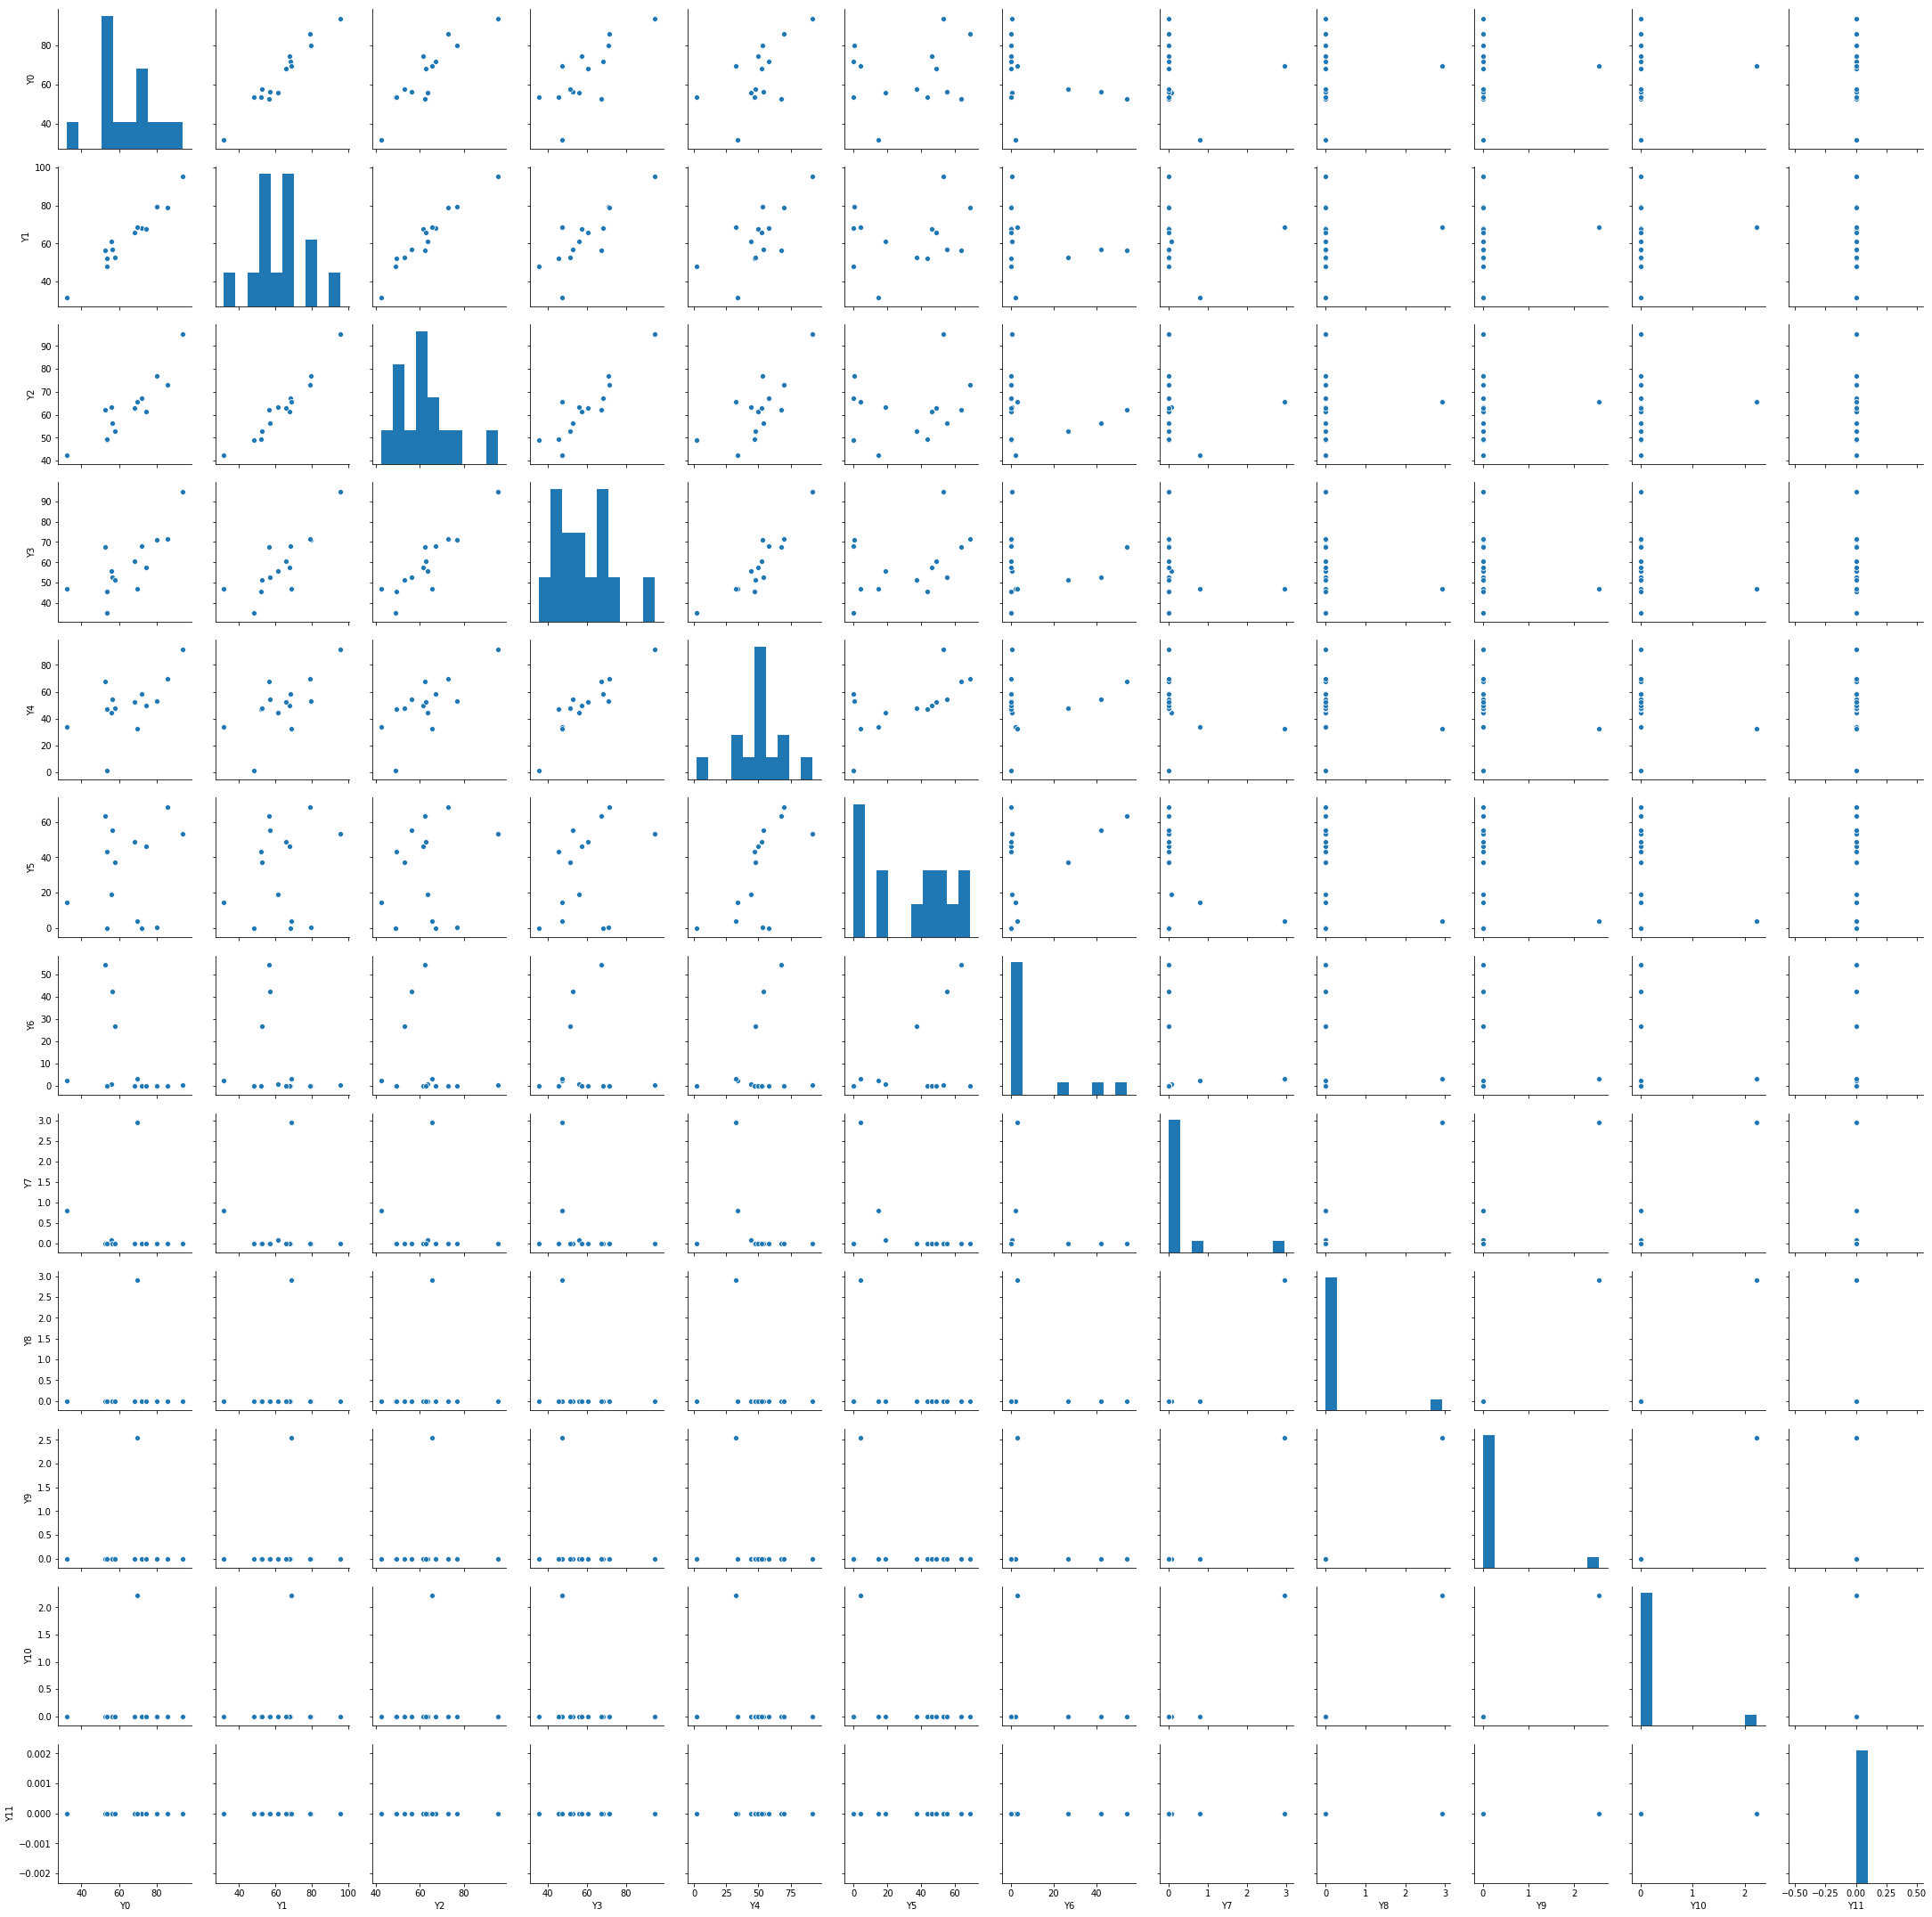

In [96]:
## Pair Plots PAIR PLOT for Class 1, Y column means.

sns.pairplot(df_class1_usermeans_Y, vars = ["Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11"], dropna = True)

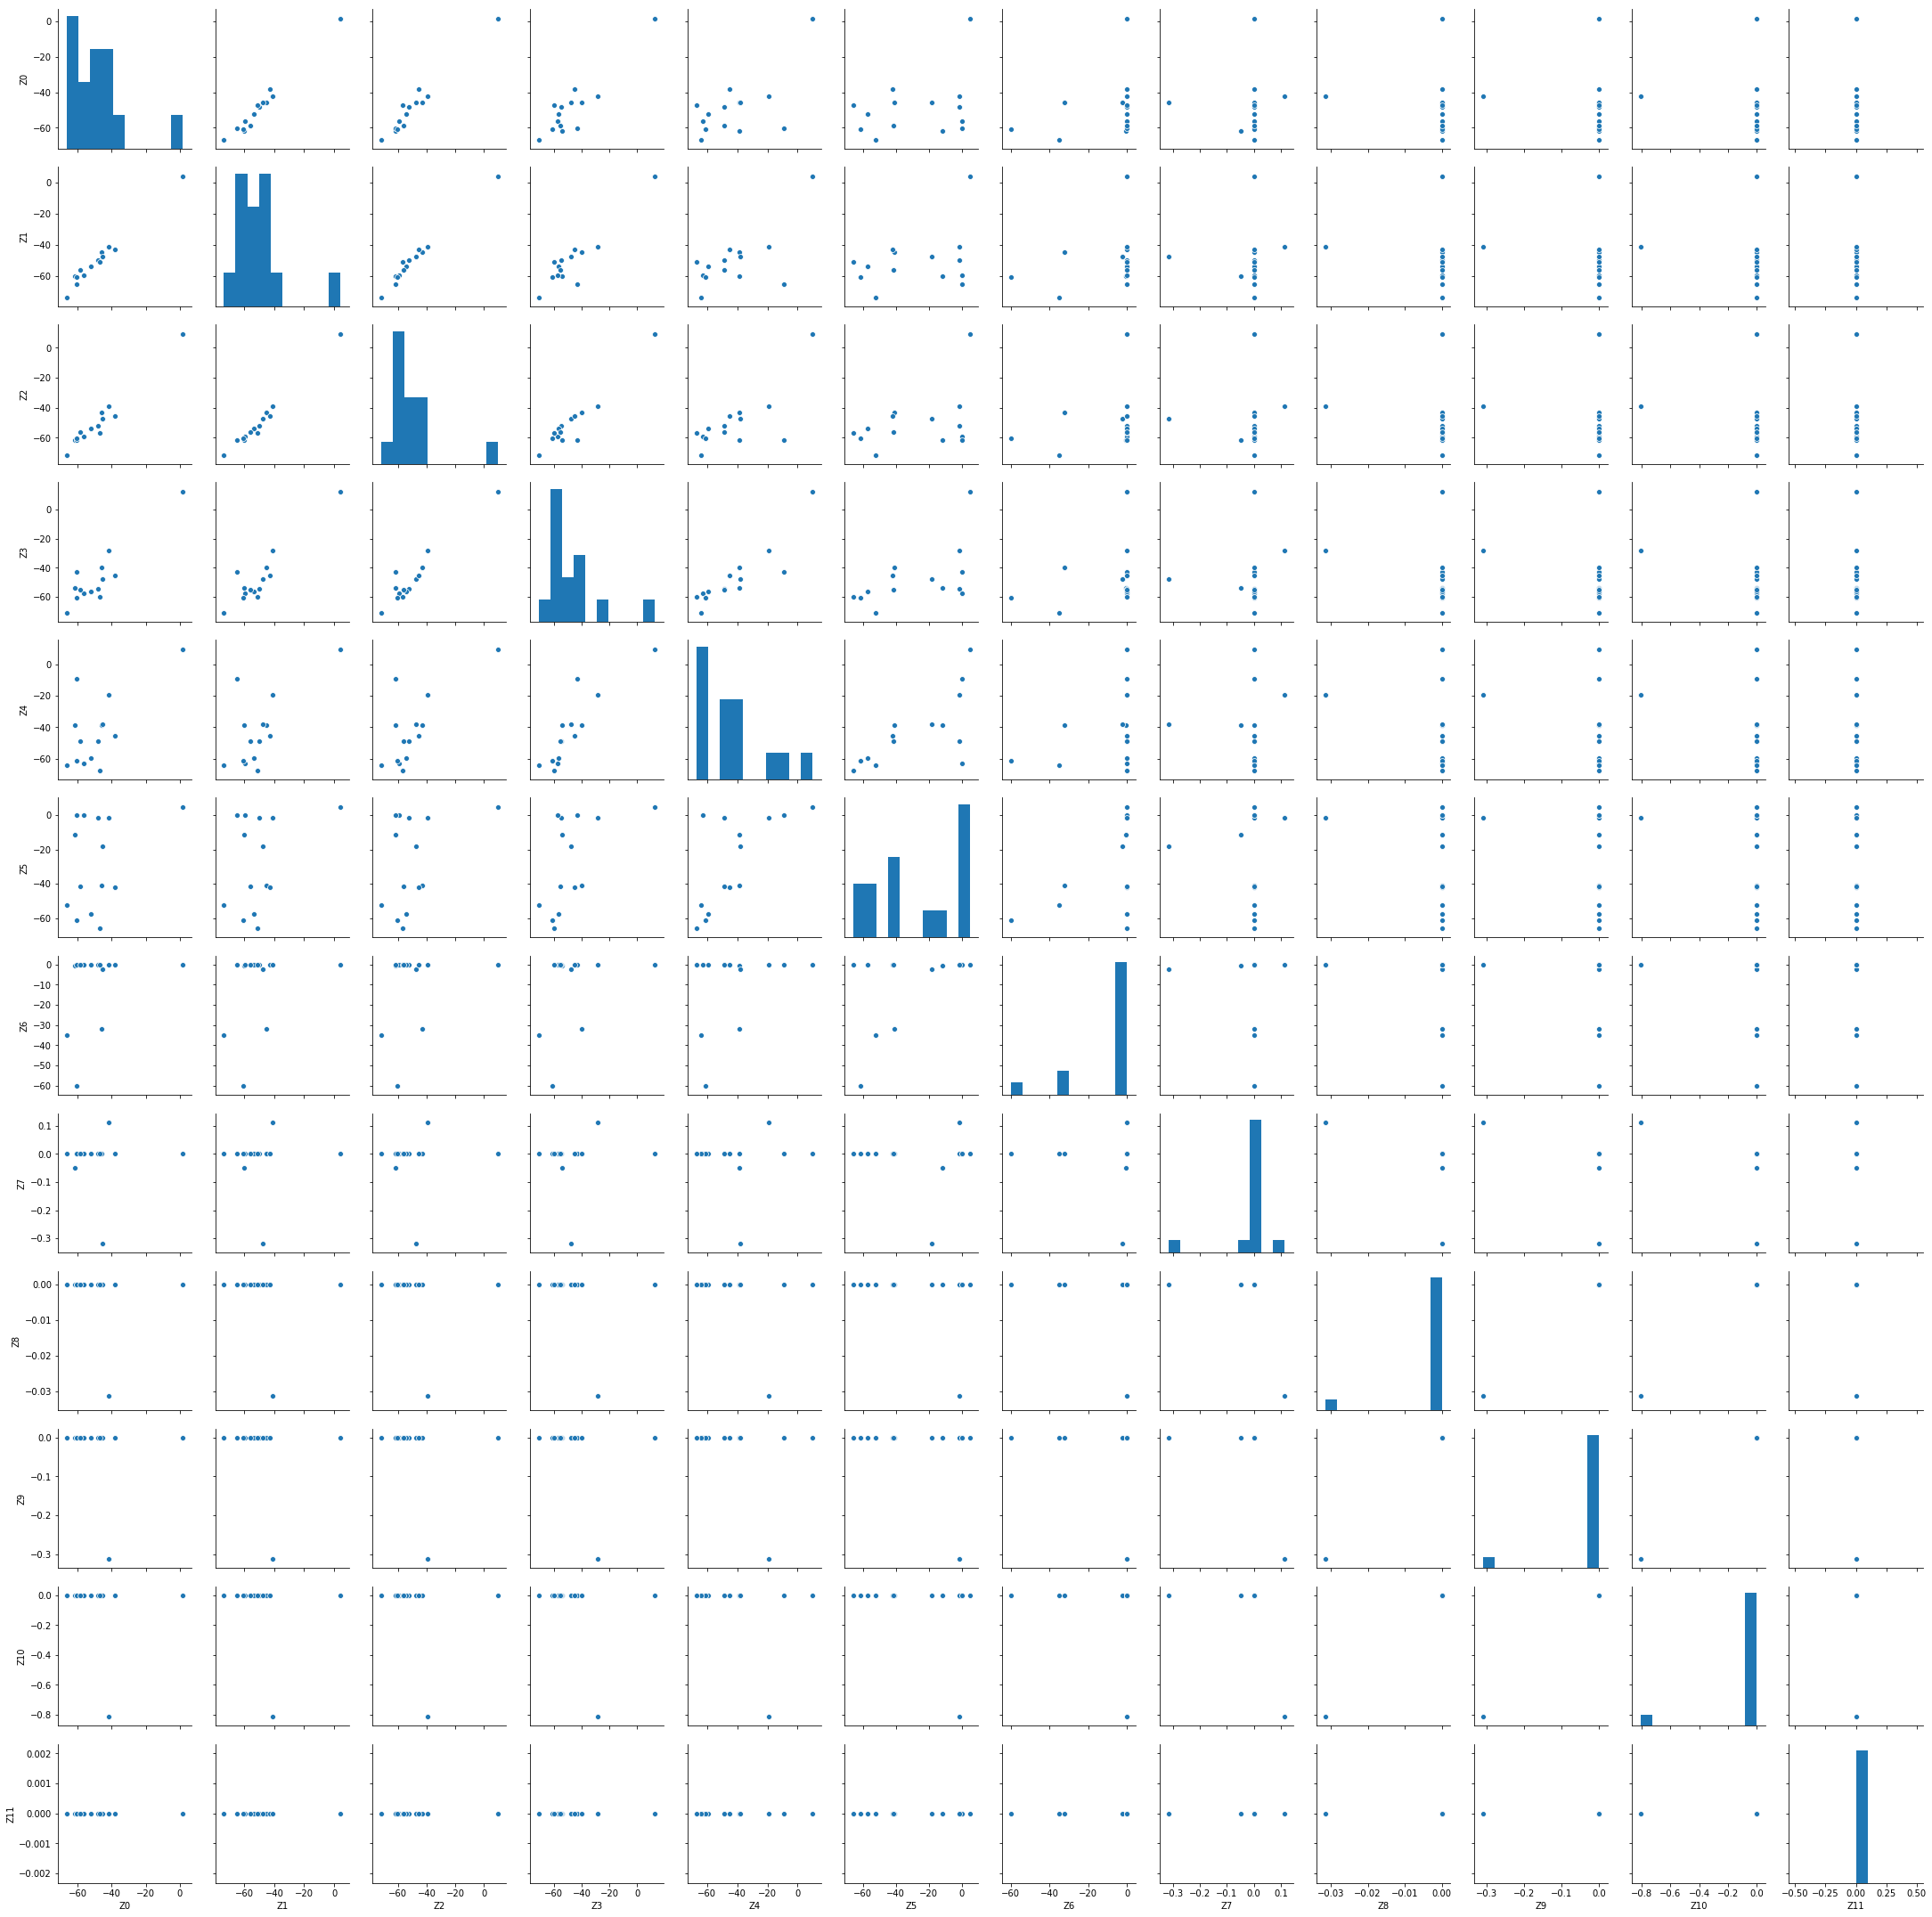

In [103]:
## PAIR PLOTS FOR Class 1, Z column means.

sns.pairplot(df_class1_usermeans_Z, vars = ["Z0", "Z1", "Z2", "Z3", "Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11"], dropna = True)

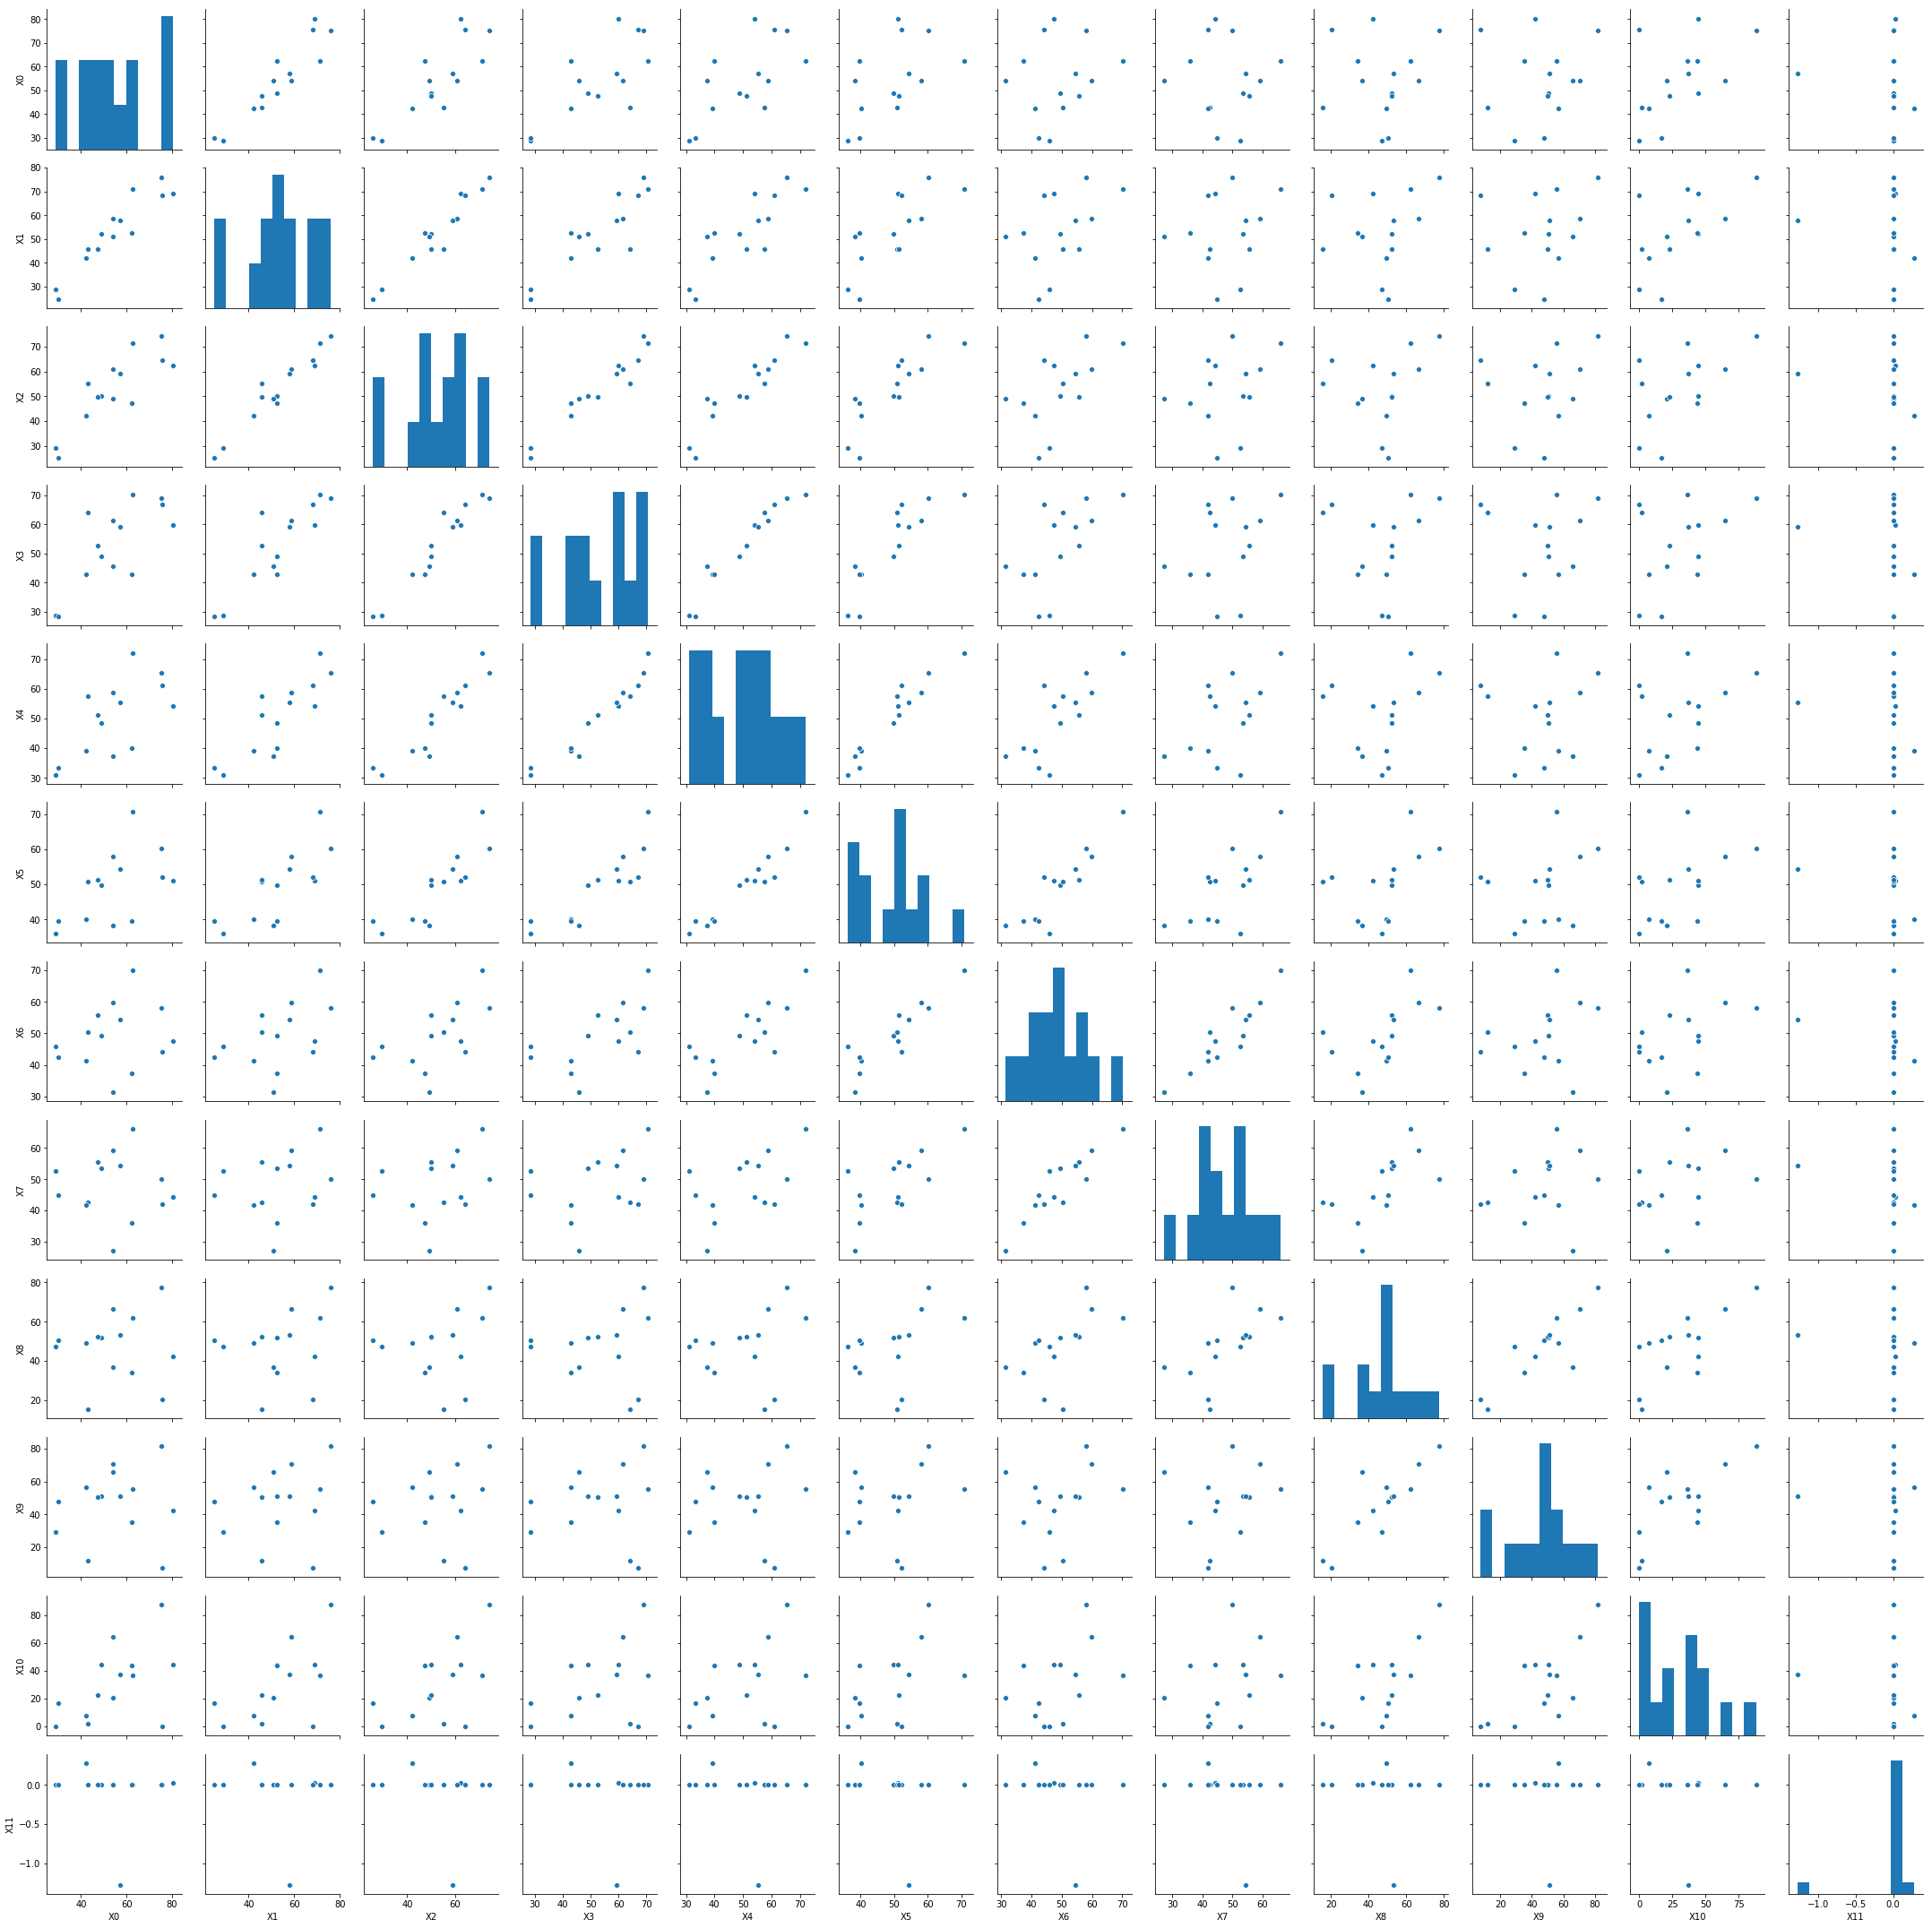

In [104]:
## PAIR PLOTS FOR CLASS 2, X columns

sns.pairplot(df_class2_usermeans_X, vars = ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11"], dropna = True)

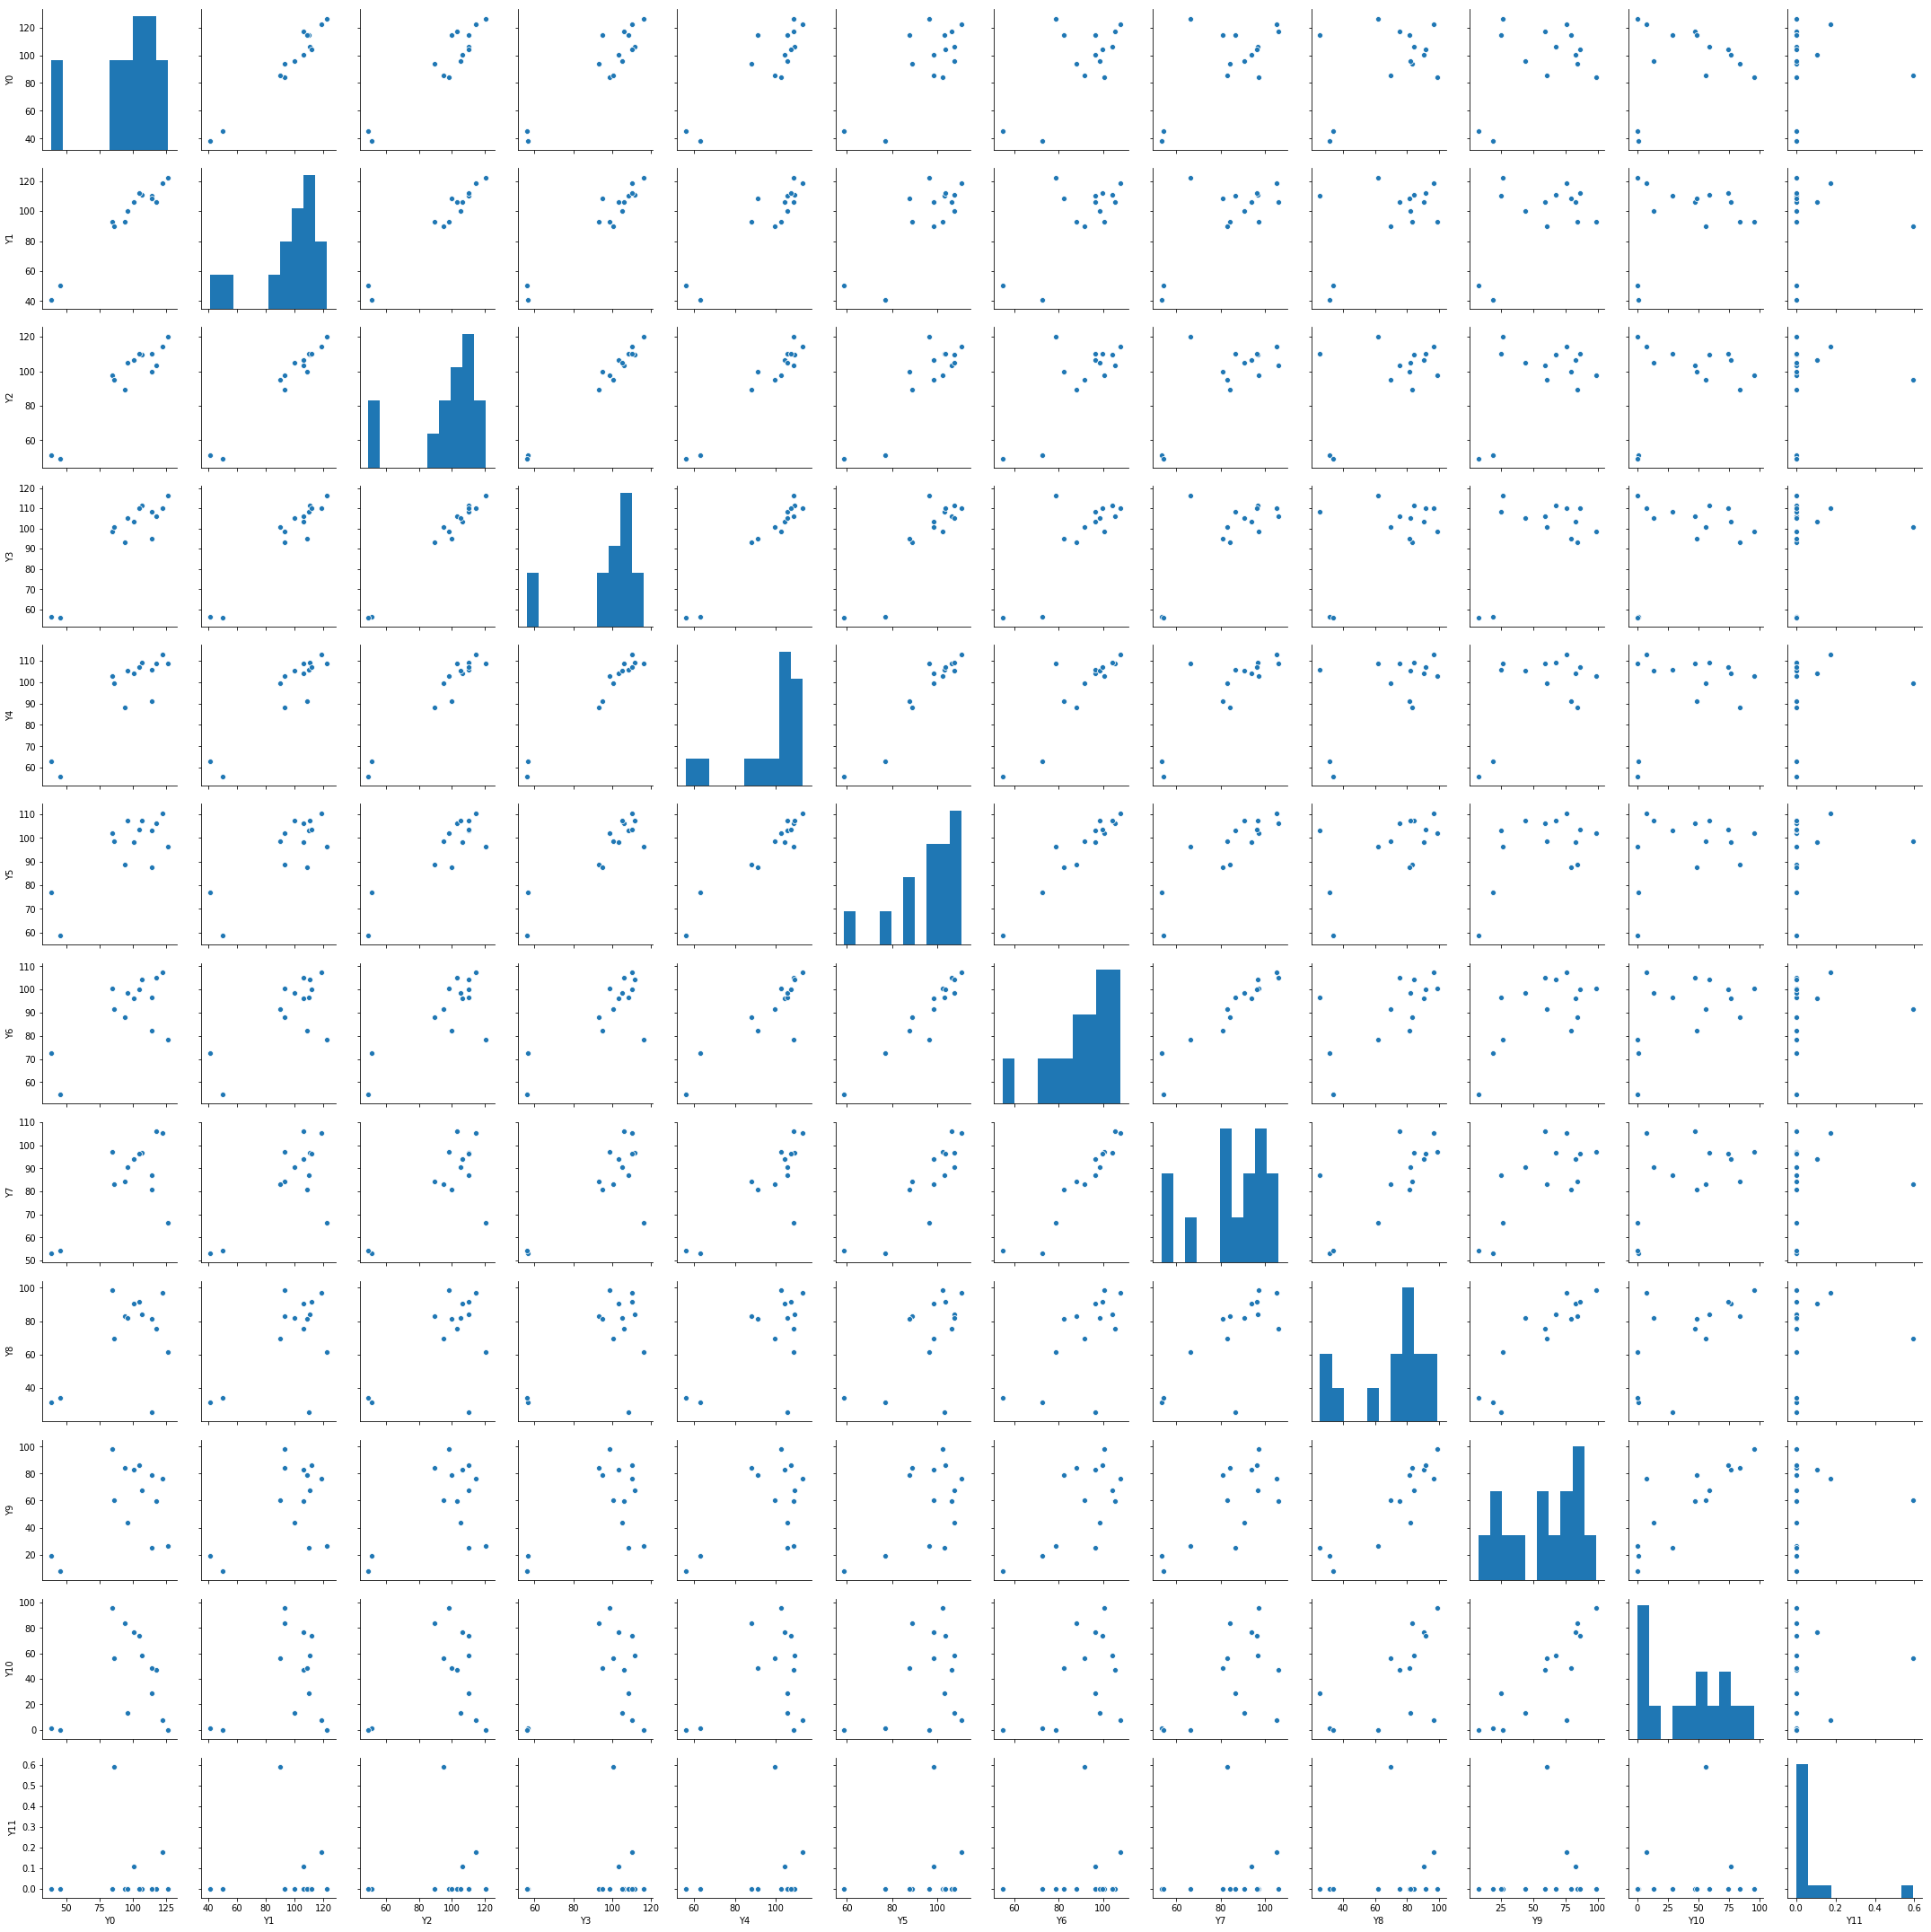

In [107]:
## Pair Plots for Class 2, Y column means.

sns.pairplot(df_class2_usermeans_Y, vars = ["Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11"], dropna = True)

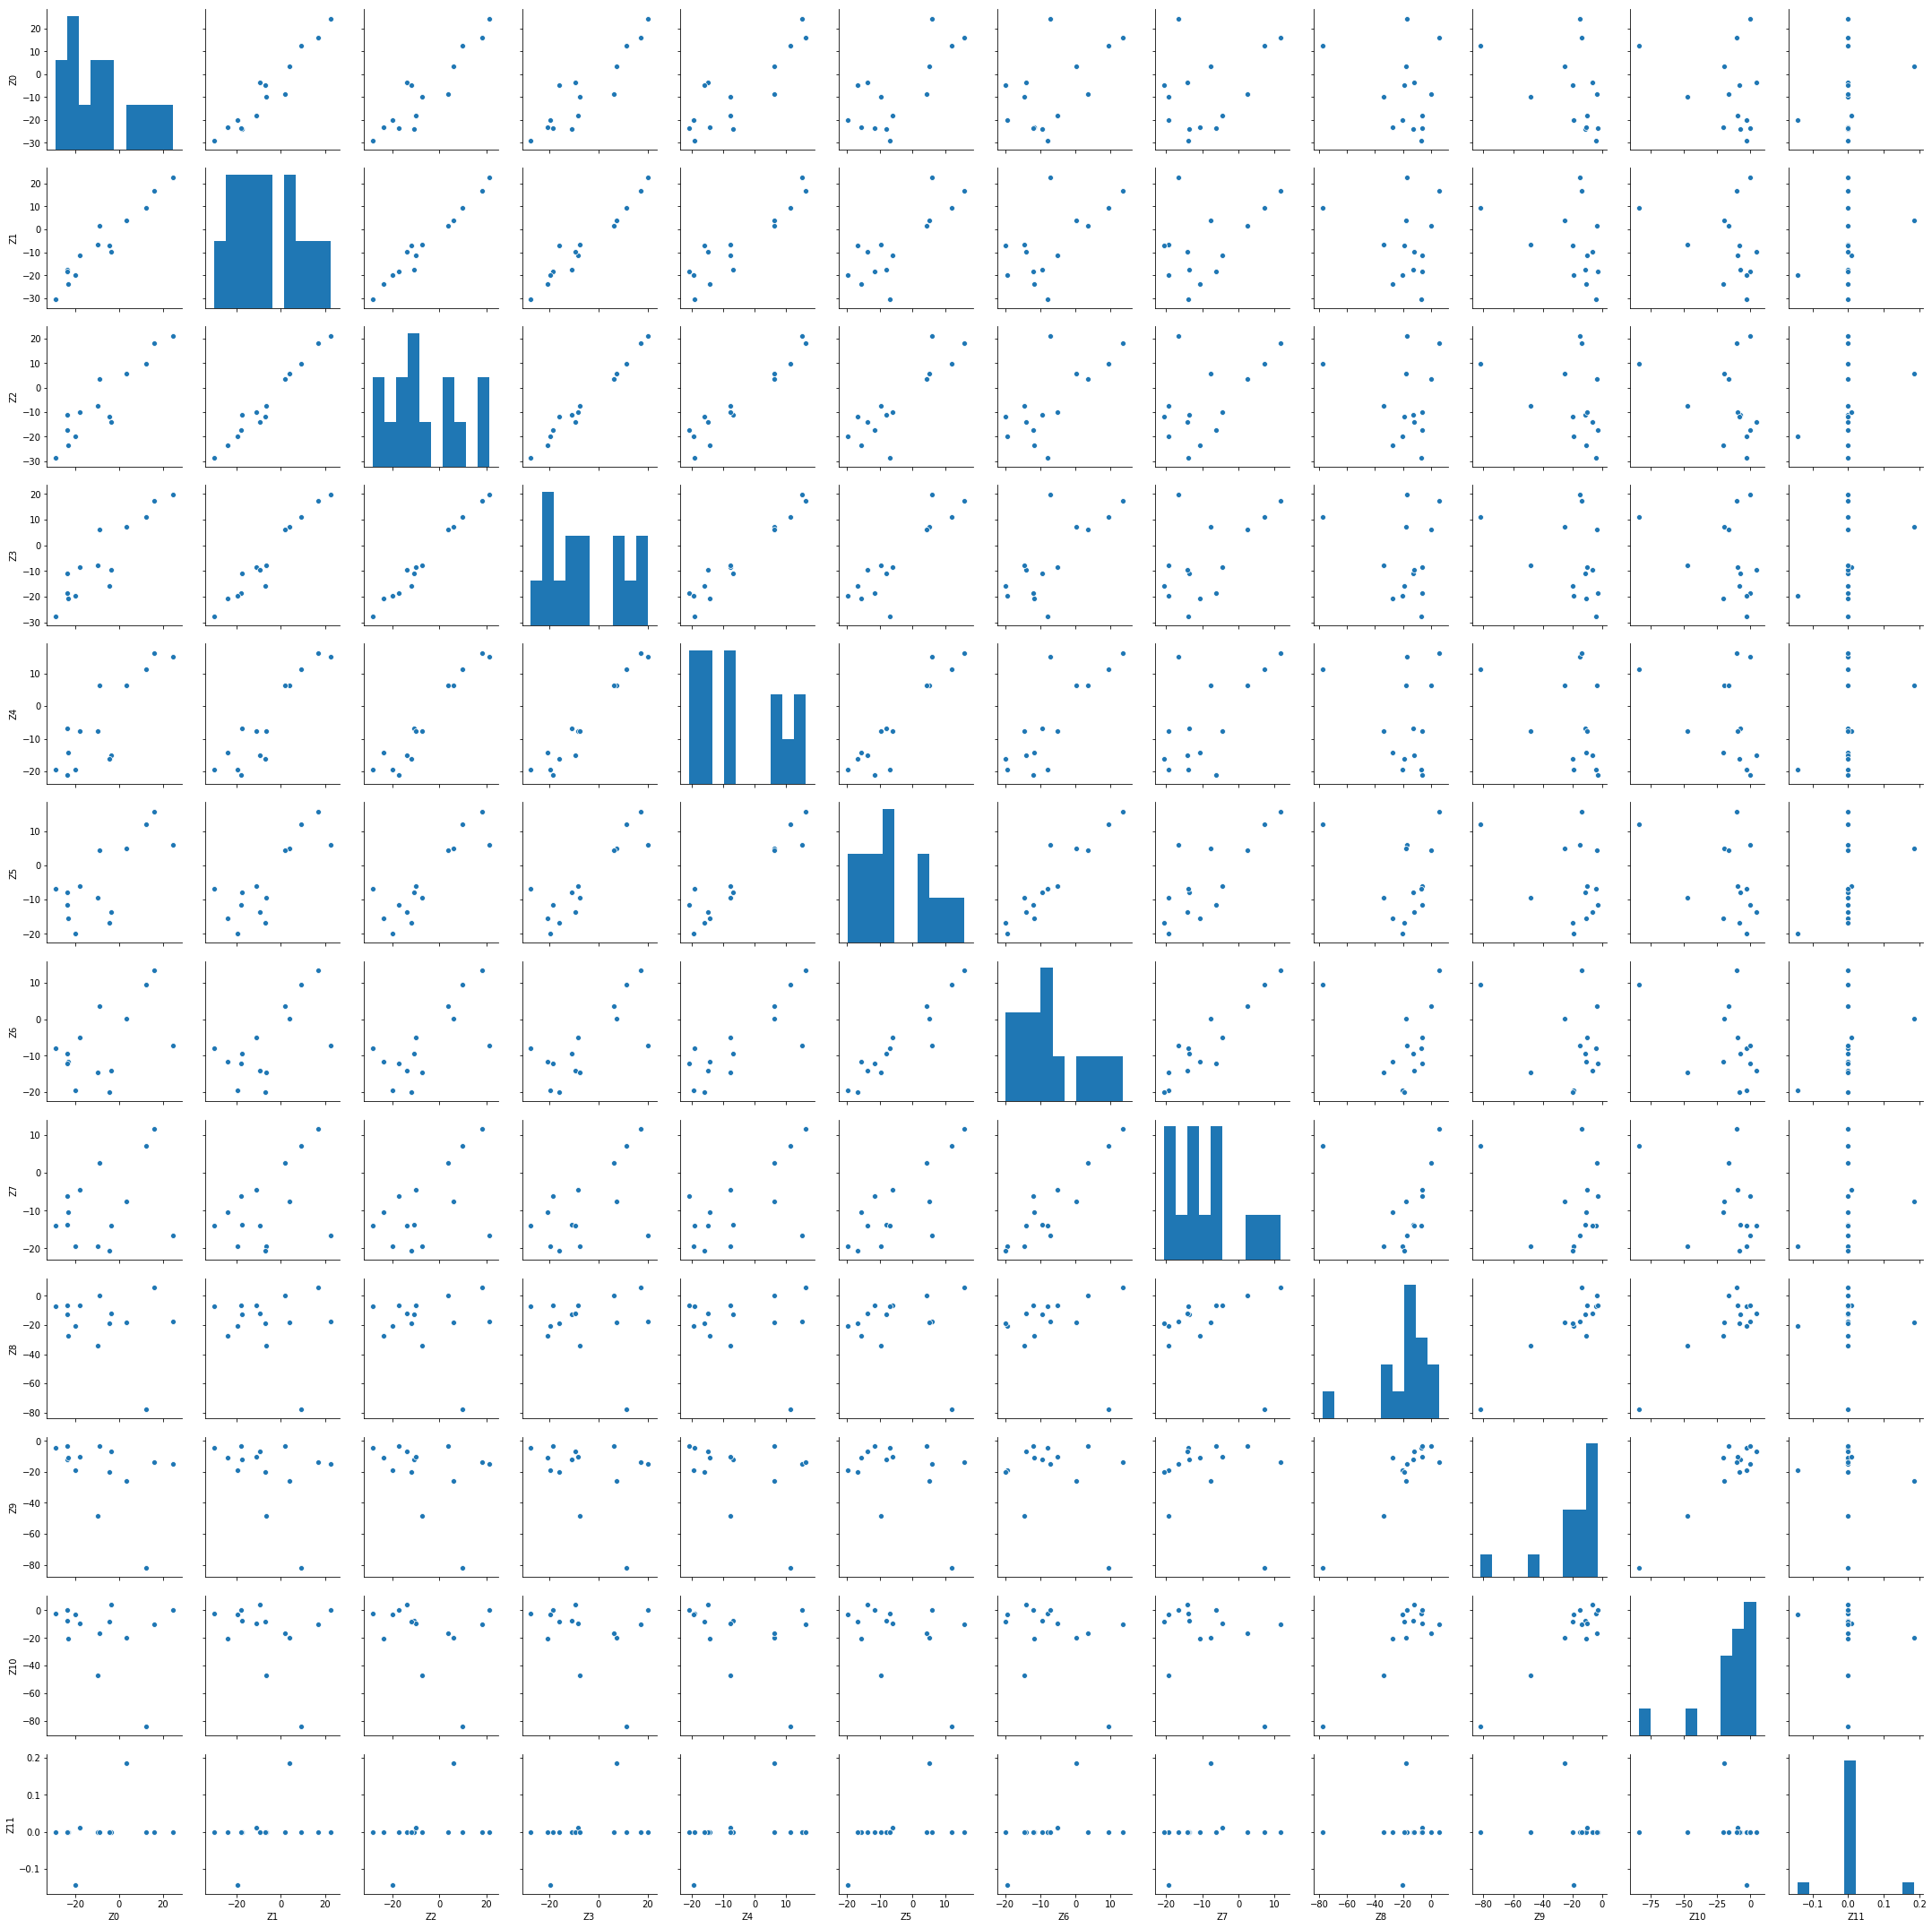

In [108]:
## PAIR PLOTS FOR Class 2, Z column means.

sns.pairplot(df_class2_usermeans_Z, vars = ["Z0", "Z1", "Z2", "Z3", "Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11"], dropna = True)

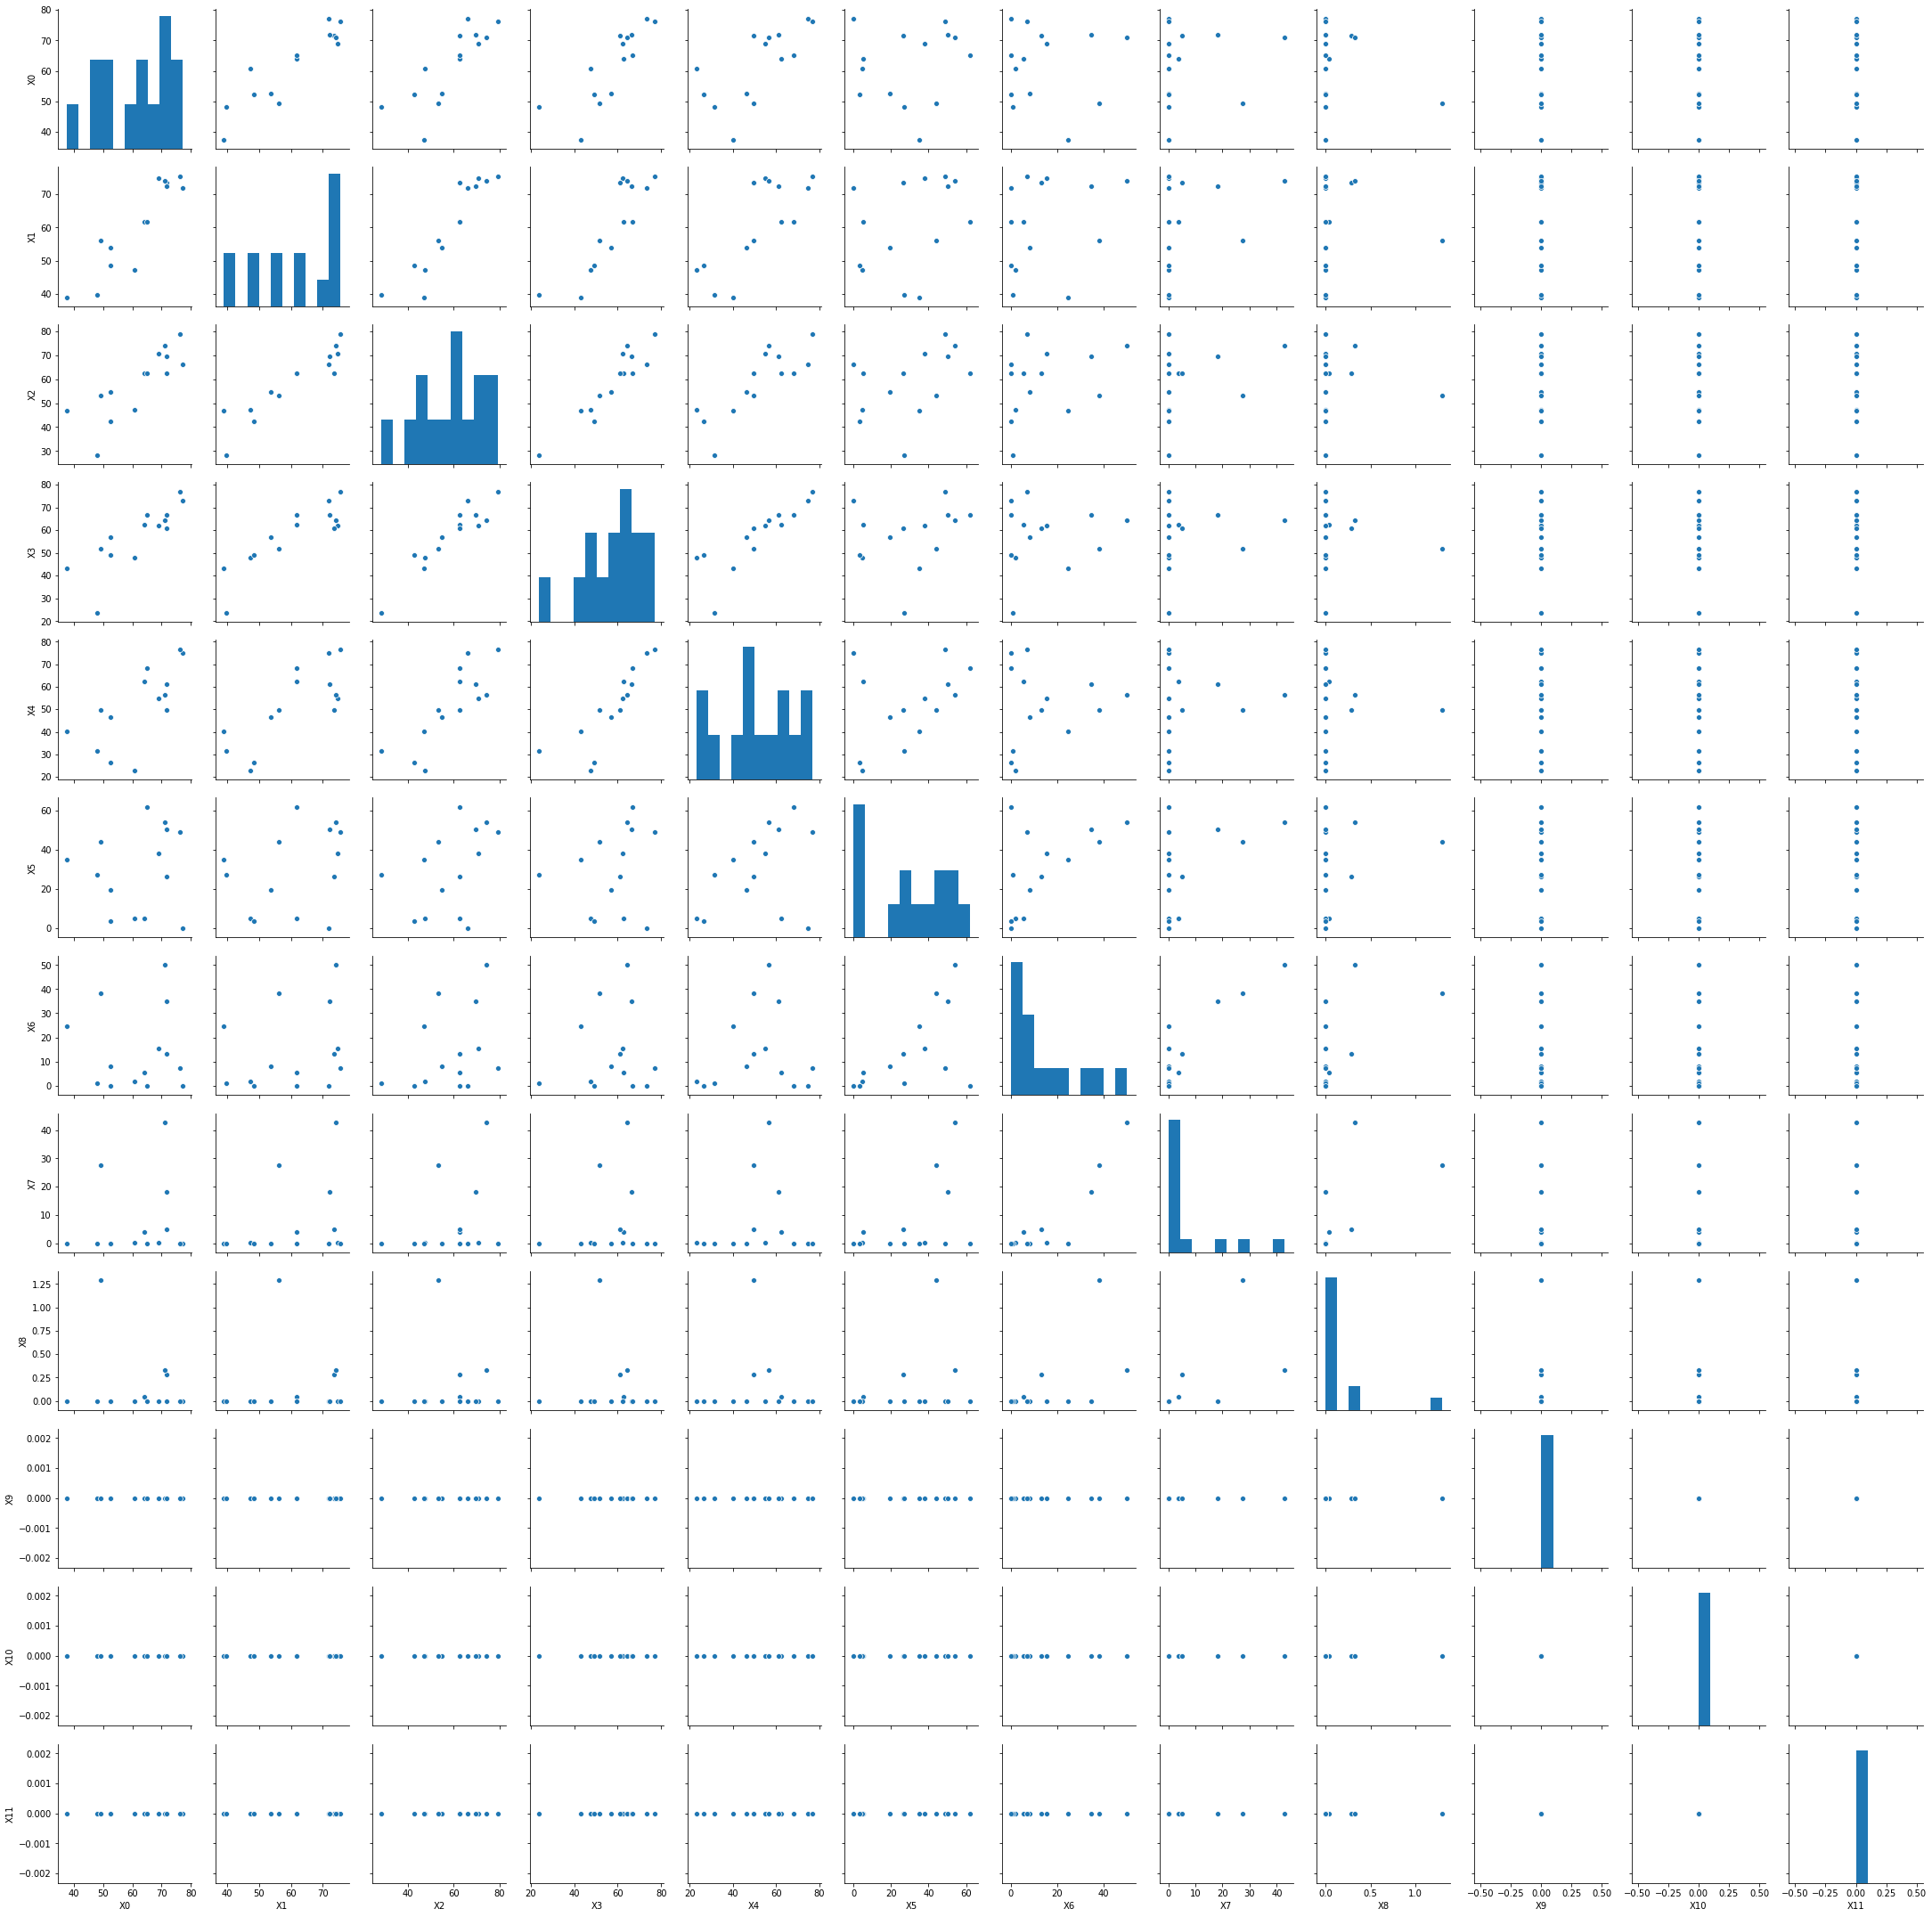

In [109]:
## PAIR PLOTS FOR CLASS 3, X columns

sns.pairplot(df_class3_usermeans_X, vars = ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11"], dropna = True)

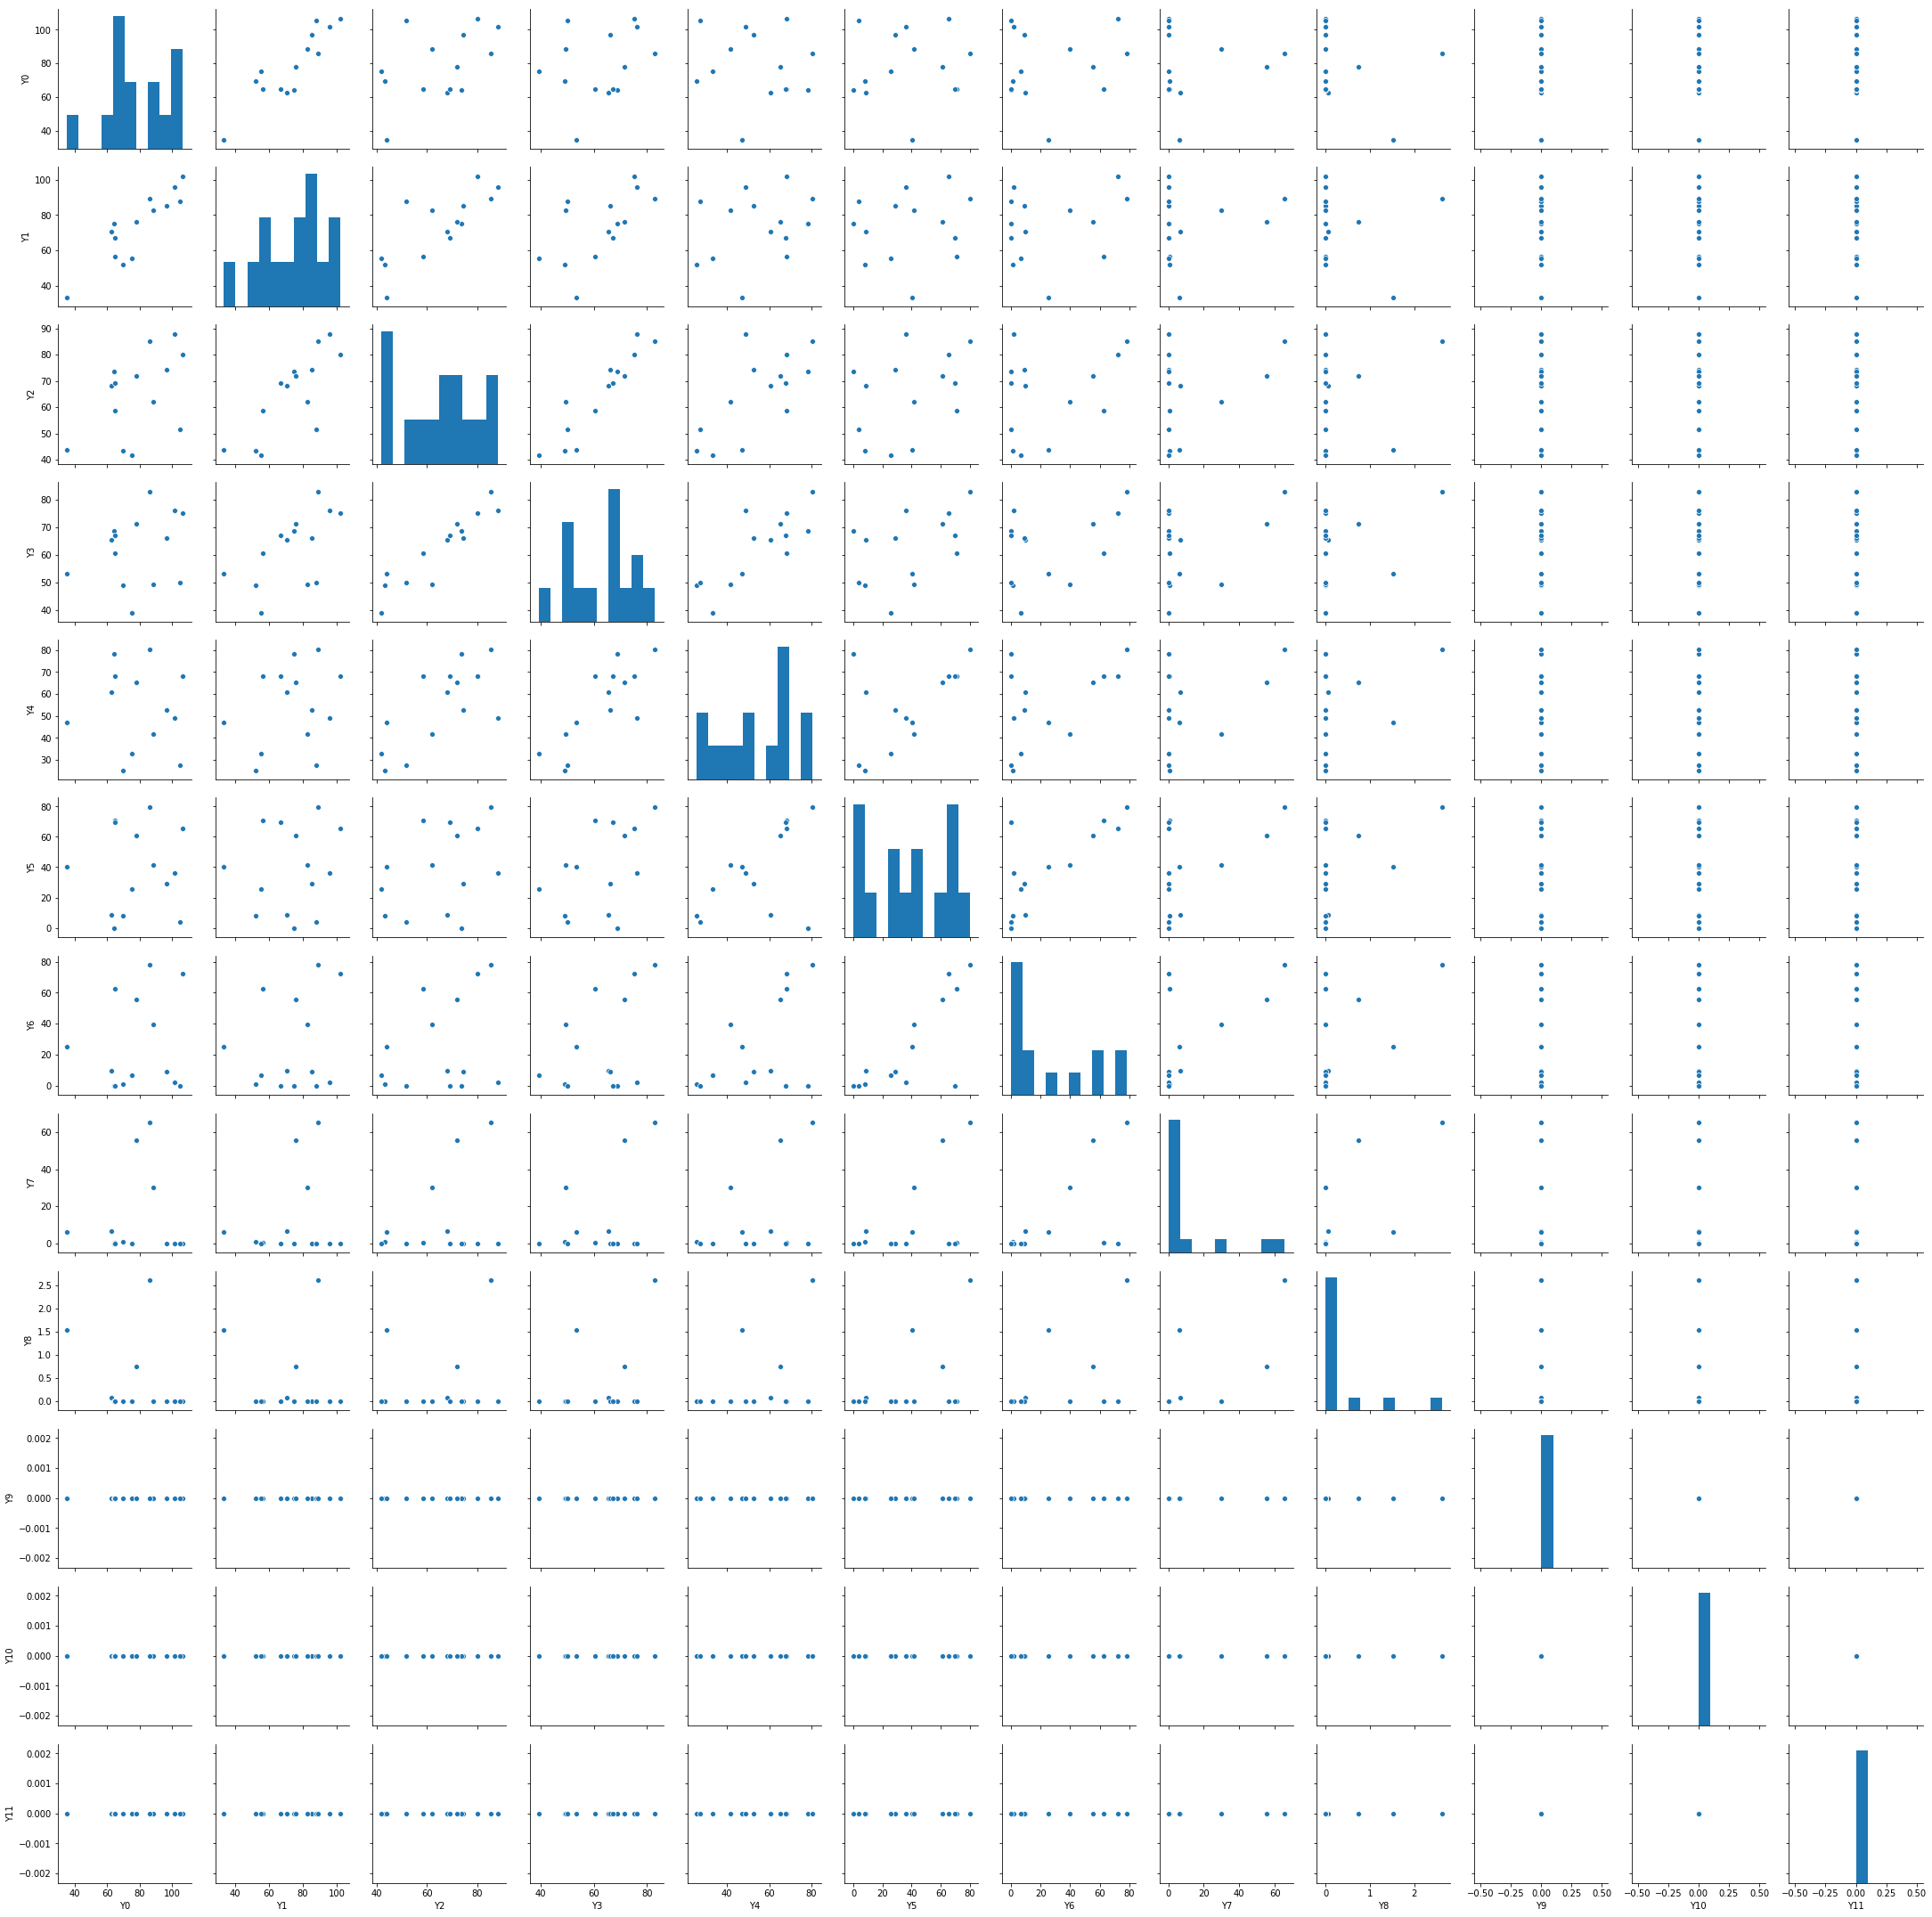

In [110]:

## Pair Plots for Class 3, Y column means.for Class 3, Y column means.
sns.pairplot(df_class3_usermeans_Y, vars = ["Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11"], dropna = True)

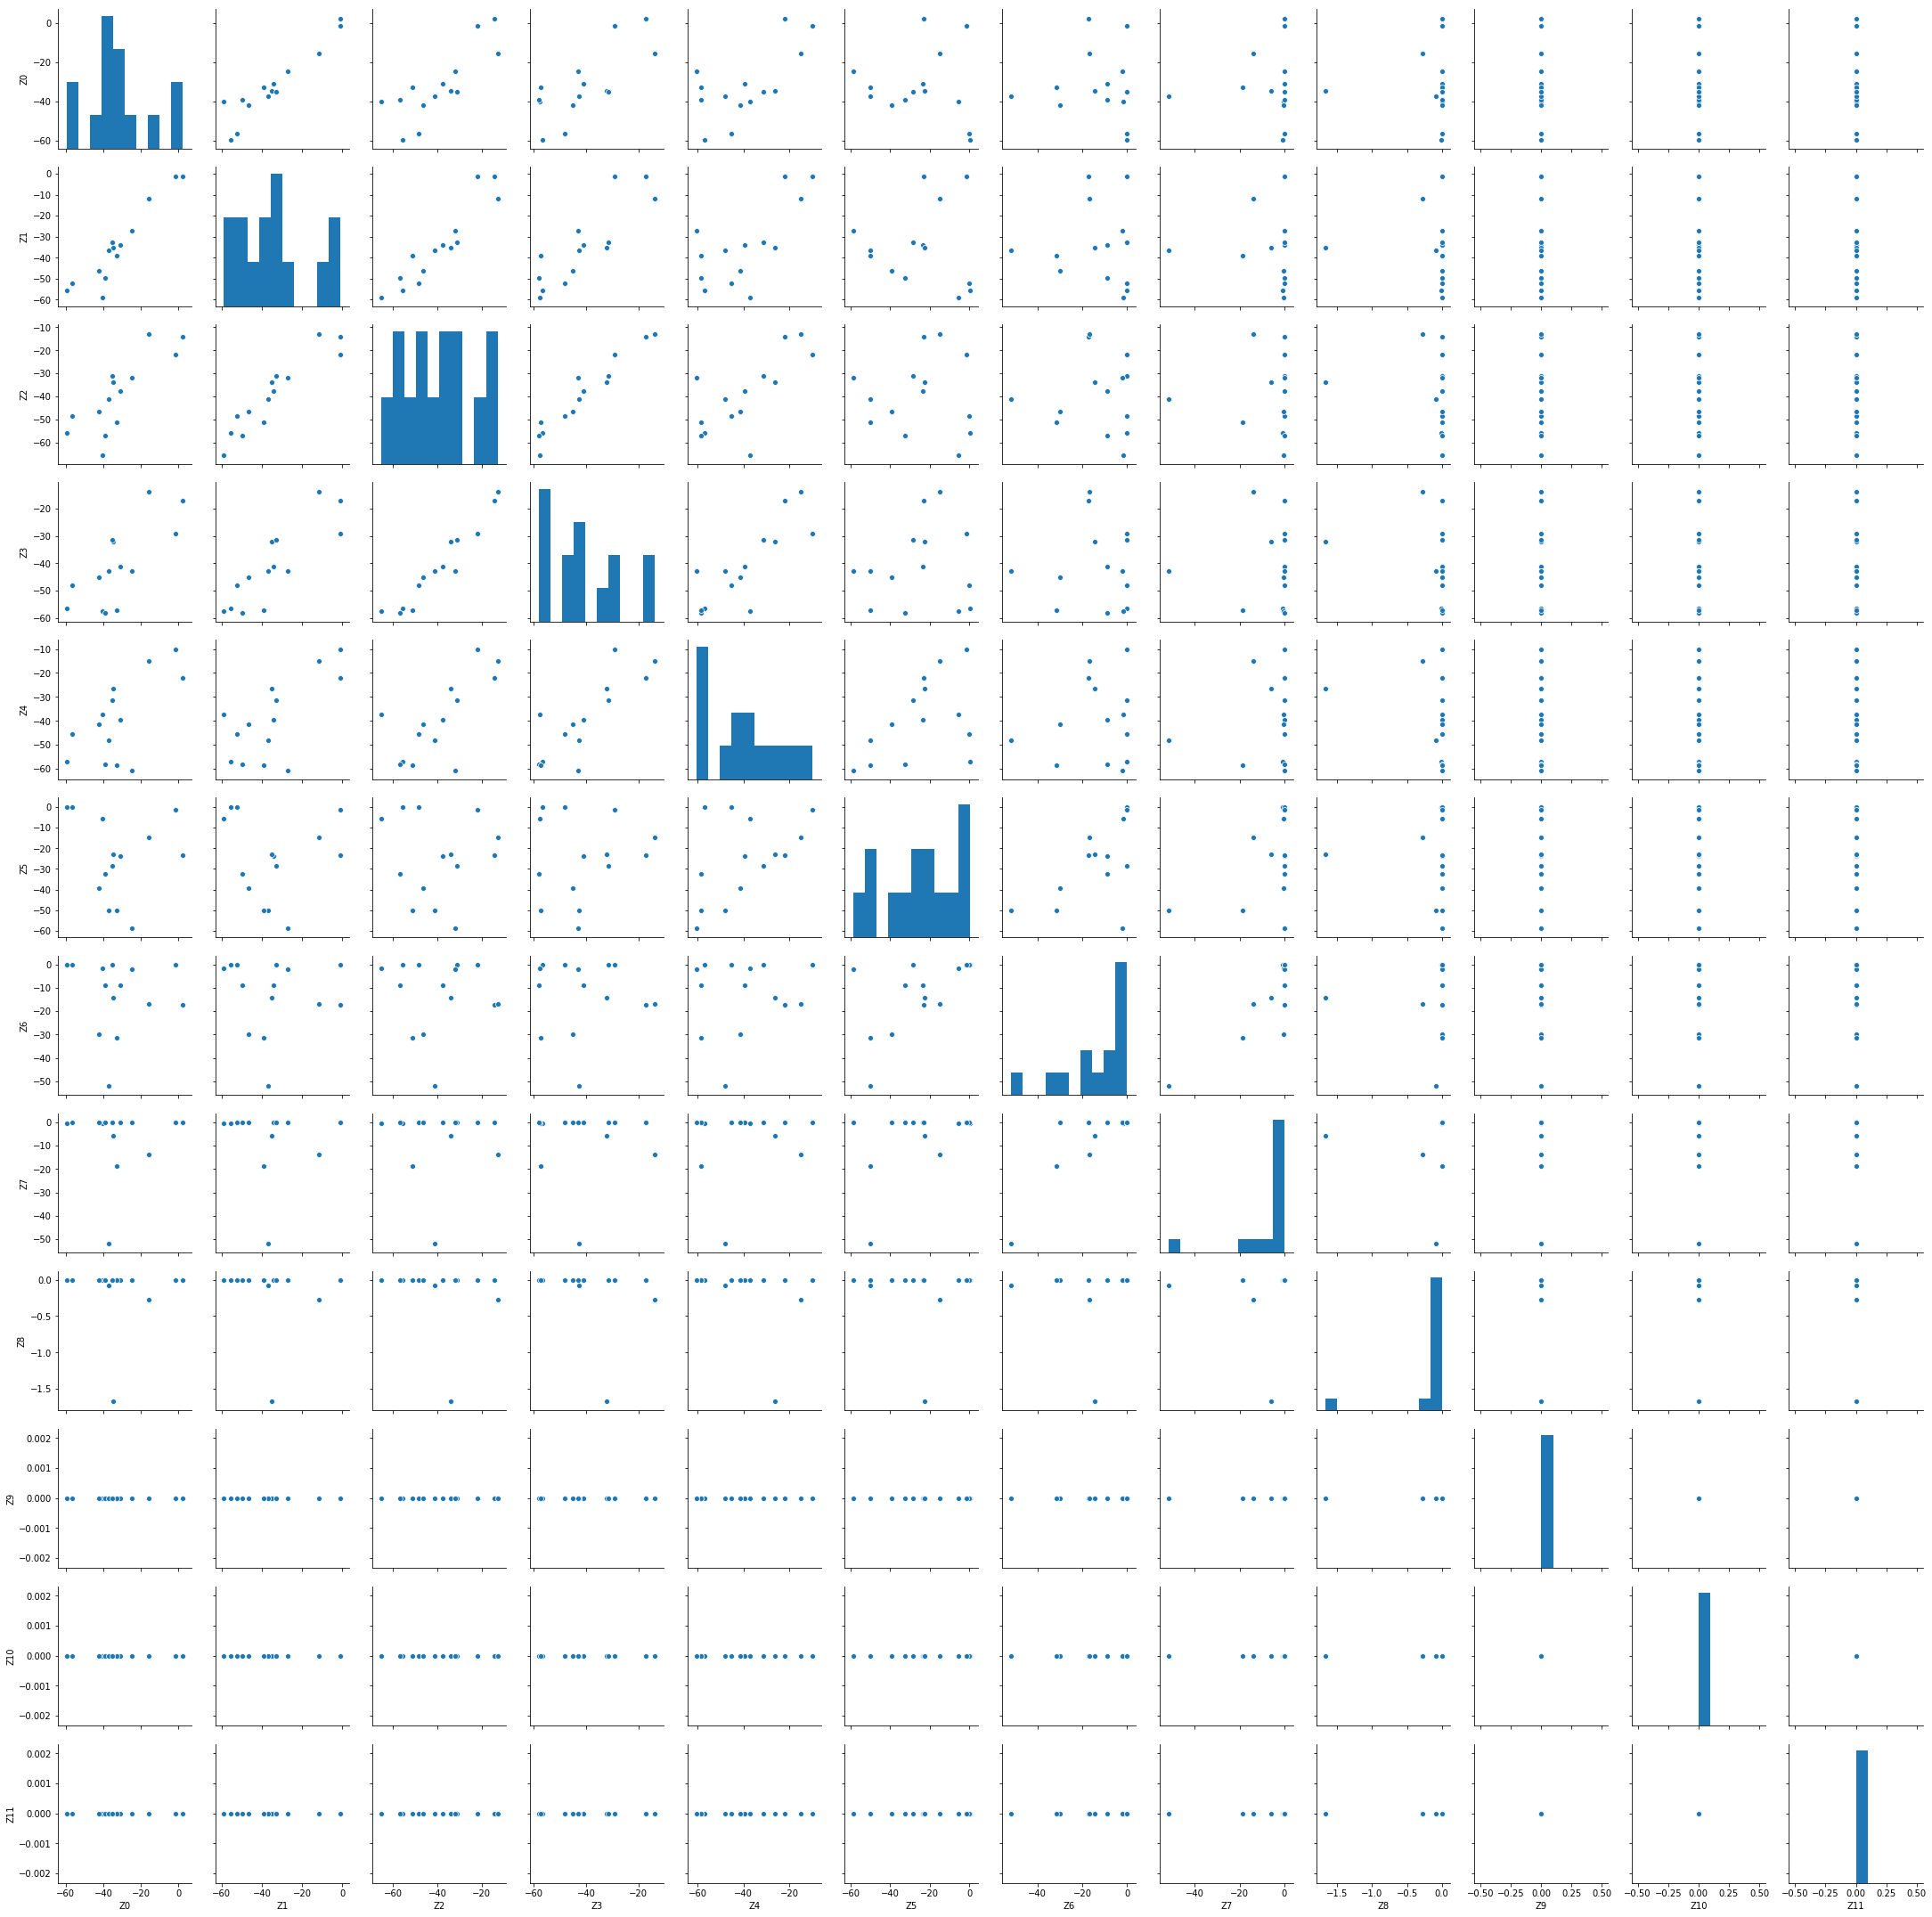

In [111]:
## FOR Class 3, Z column means.

sns.pairplot(df_class3_usermeans_Z, vars = ["Z0", "Z1", "Z2", "Z3", "Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11"], dropna = True)

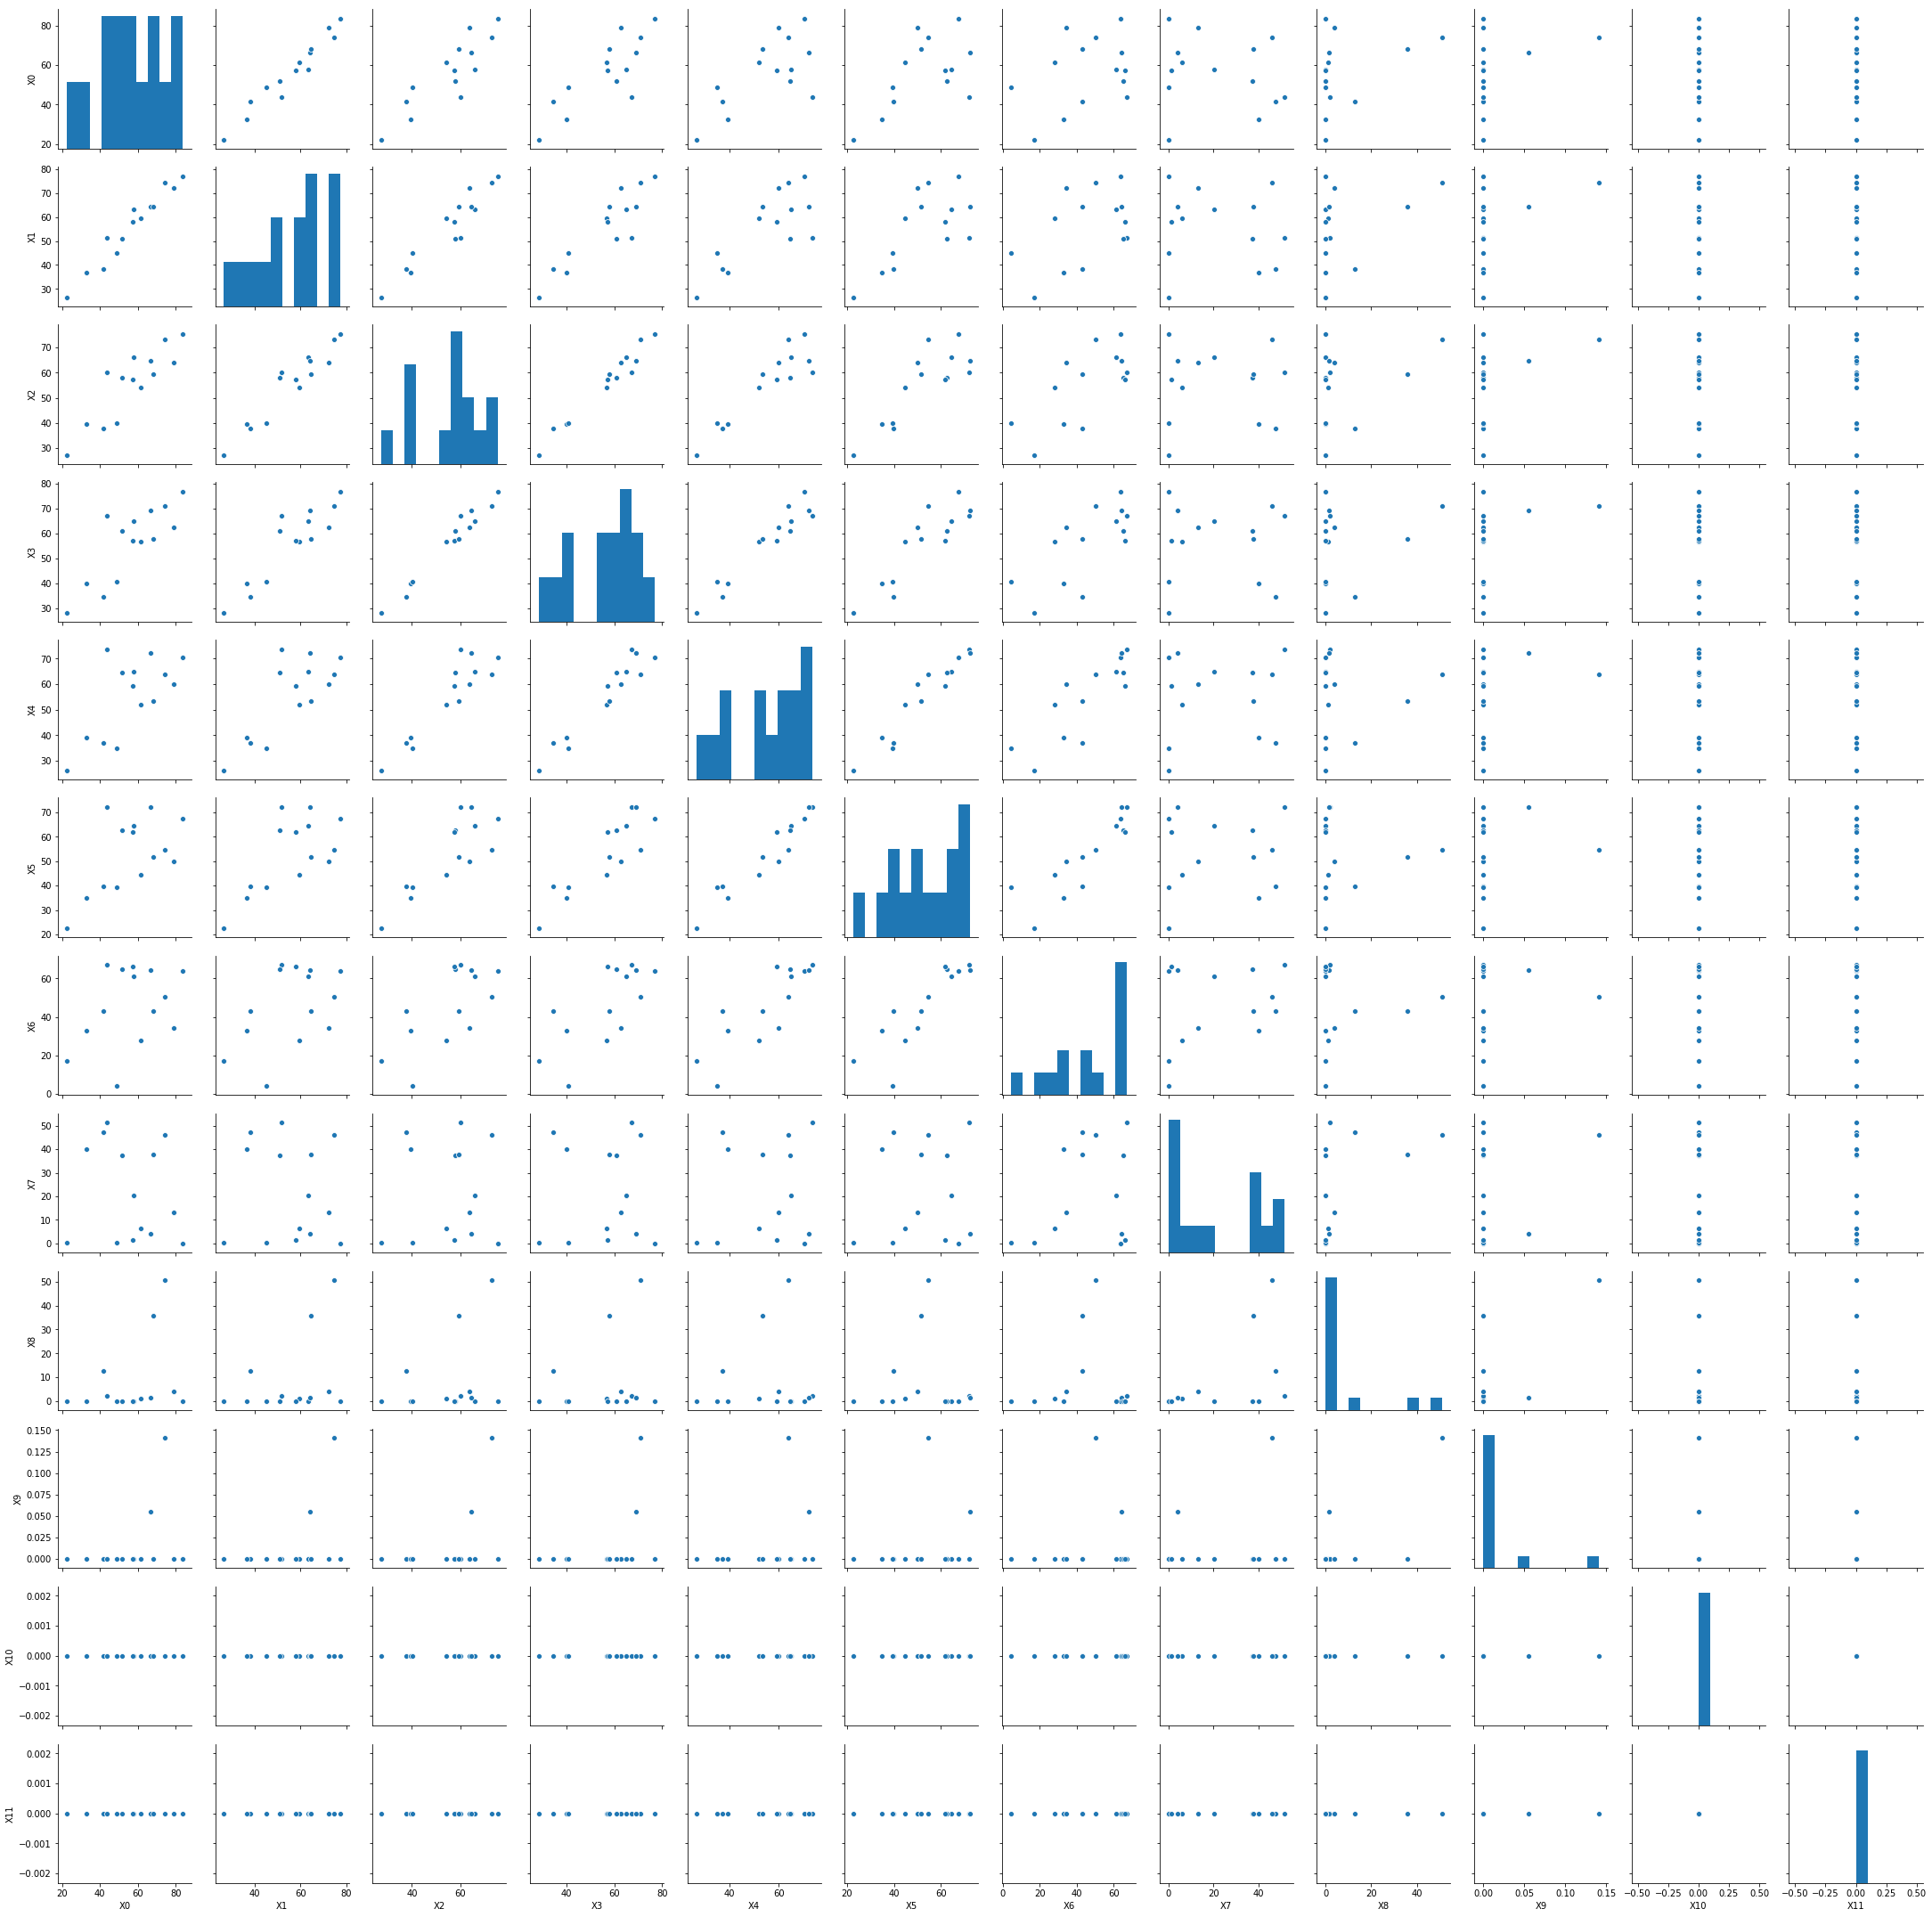

In [112]:
## FOR CLASS 4, X columns

sns.pairplot(df_class4_usermeans_X, vars = ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11"], dropna = True)

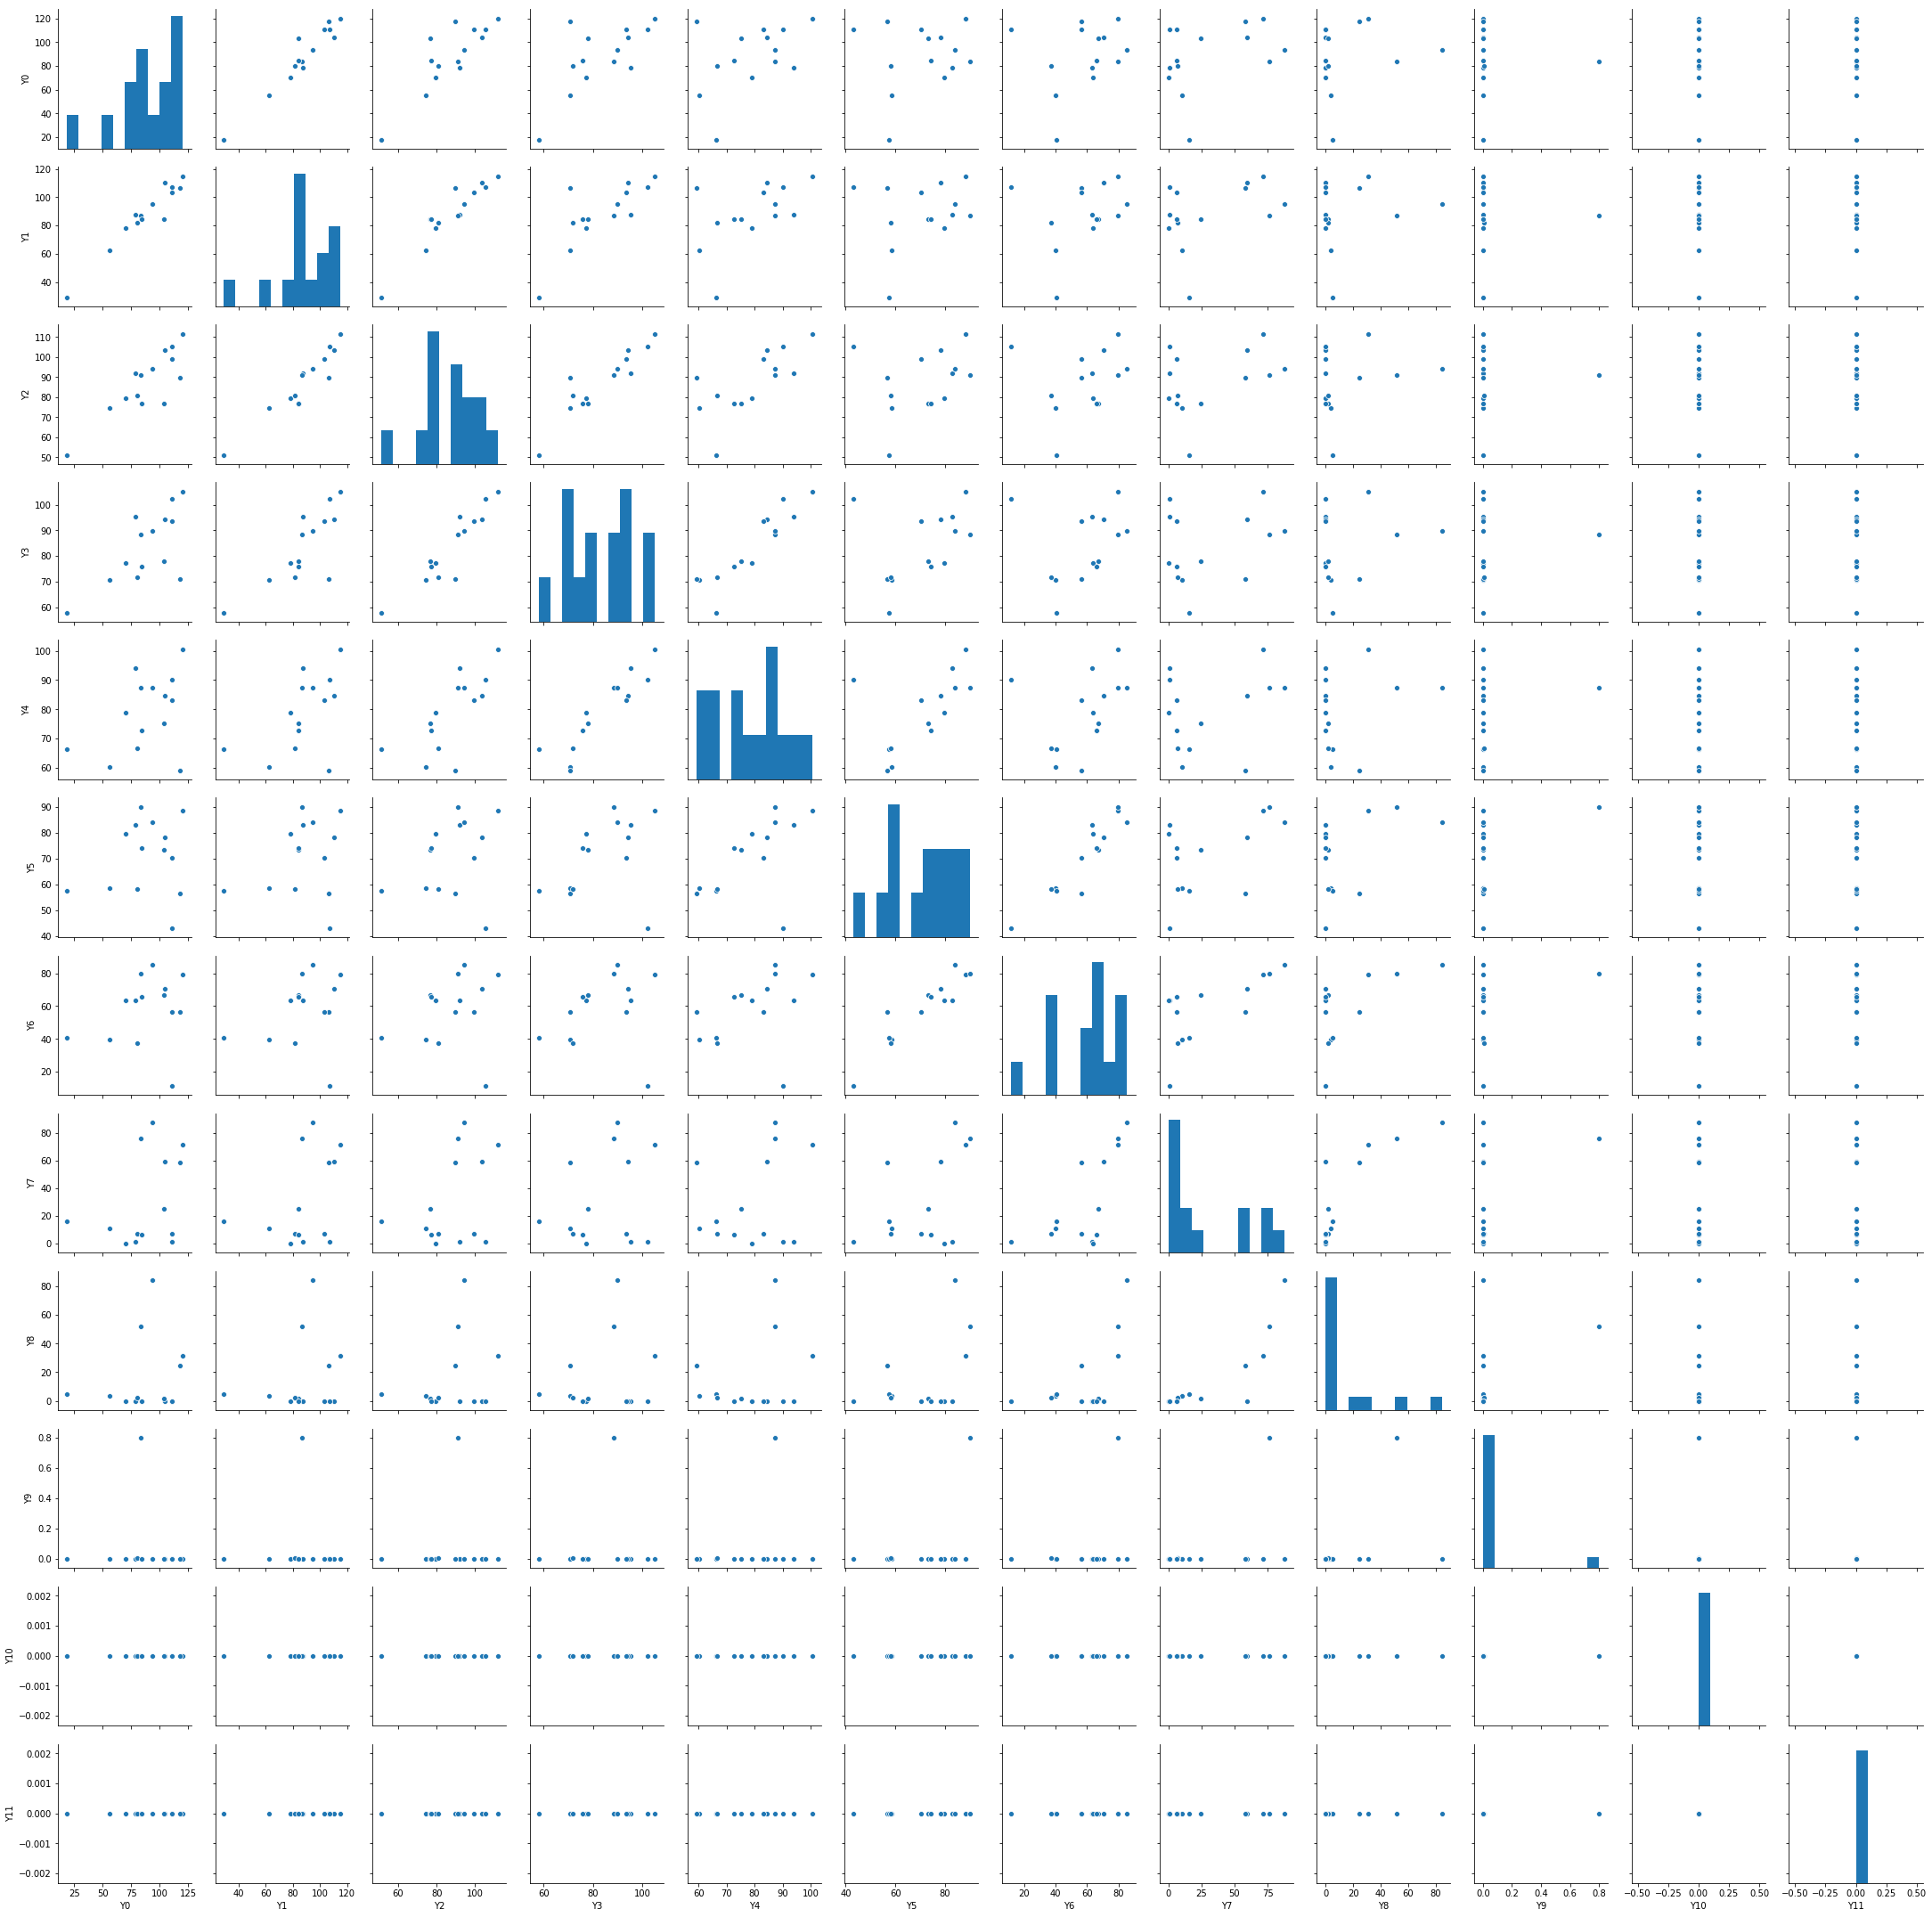

In [113]:
## Pair Plots for Class 4, Y column means.

sns.pairplot(df_class4_usermeans_Y, vars = ["Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11"], dropna = True)

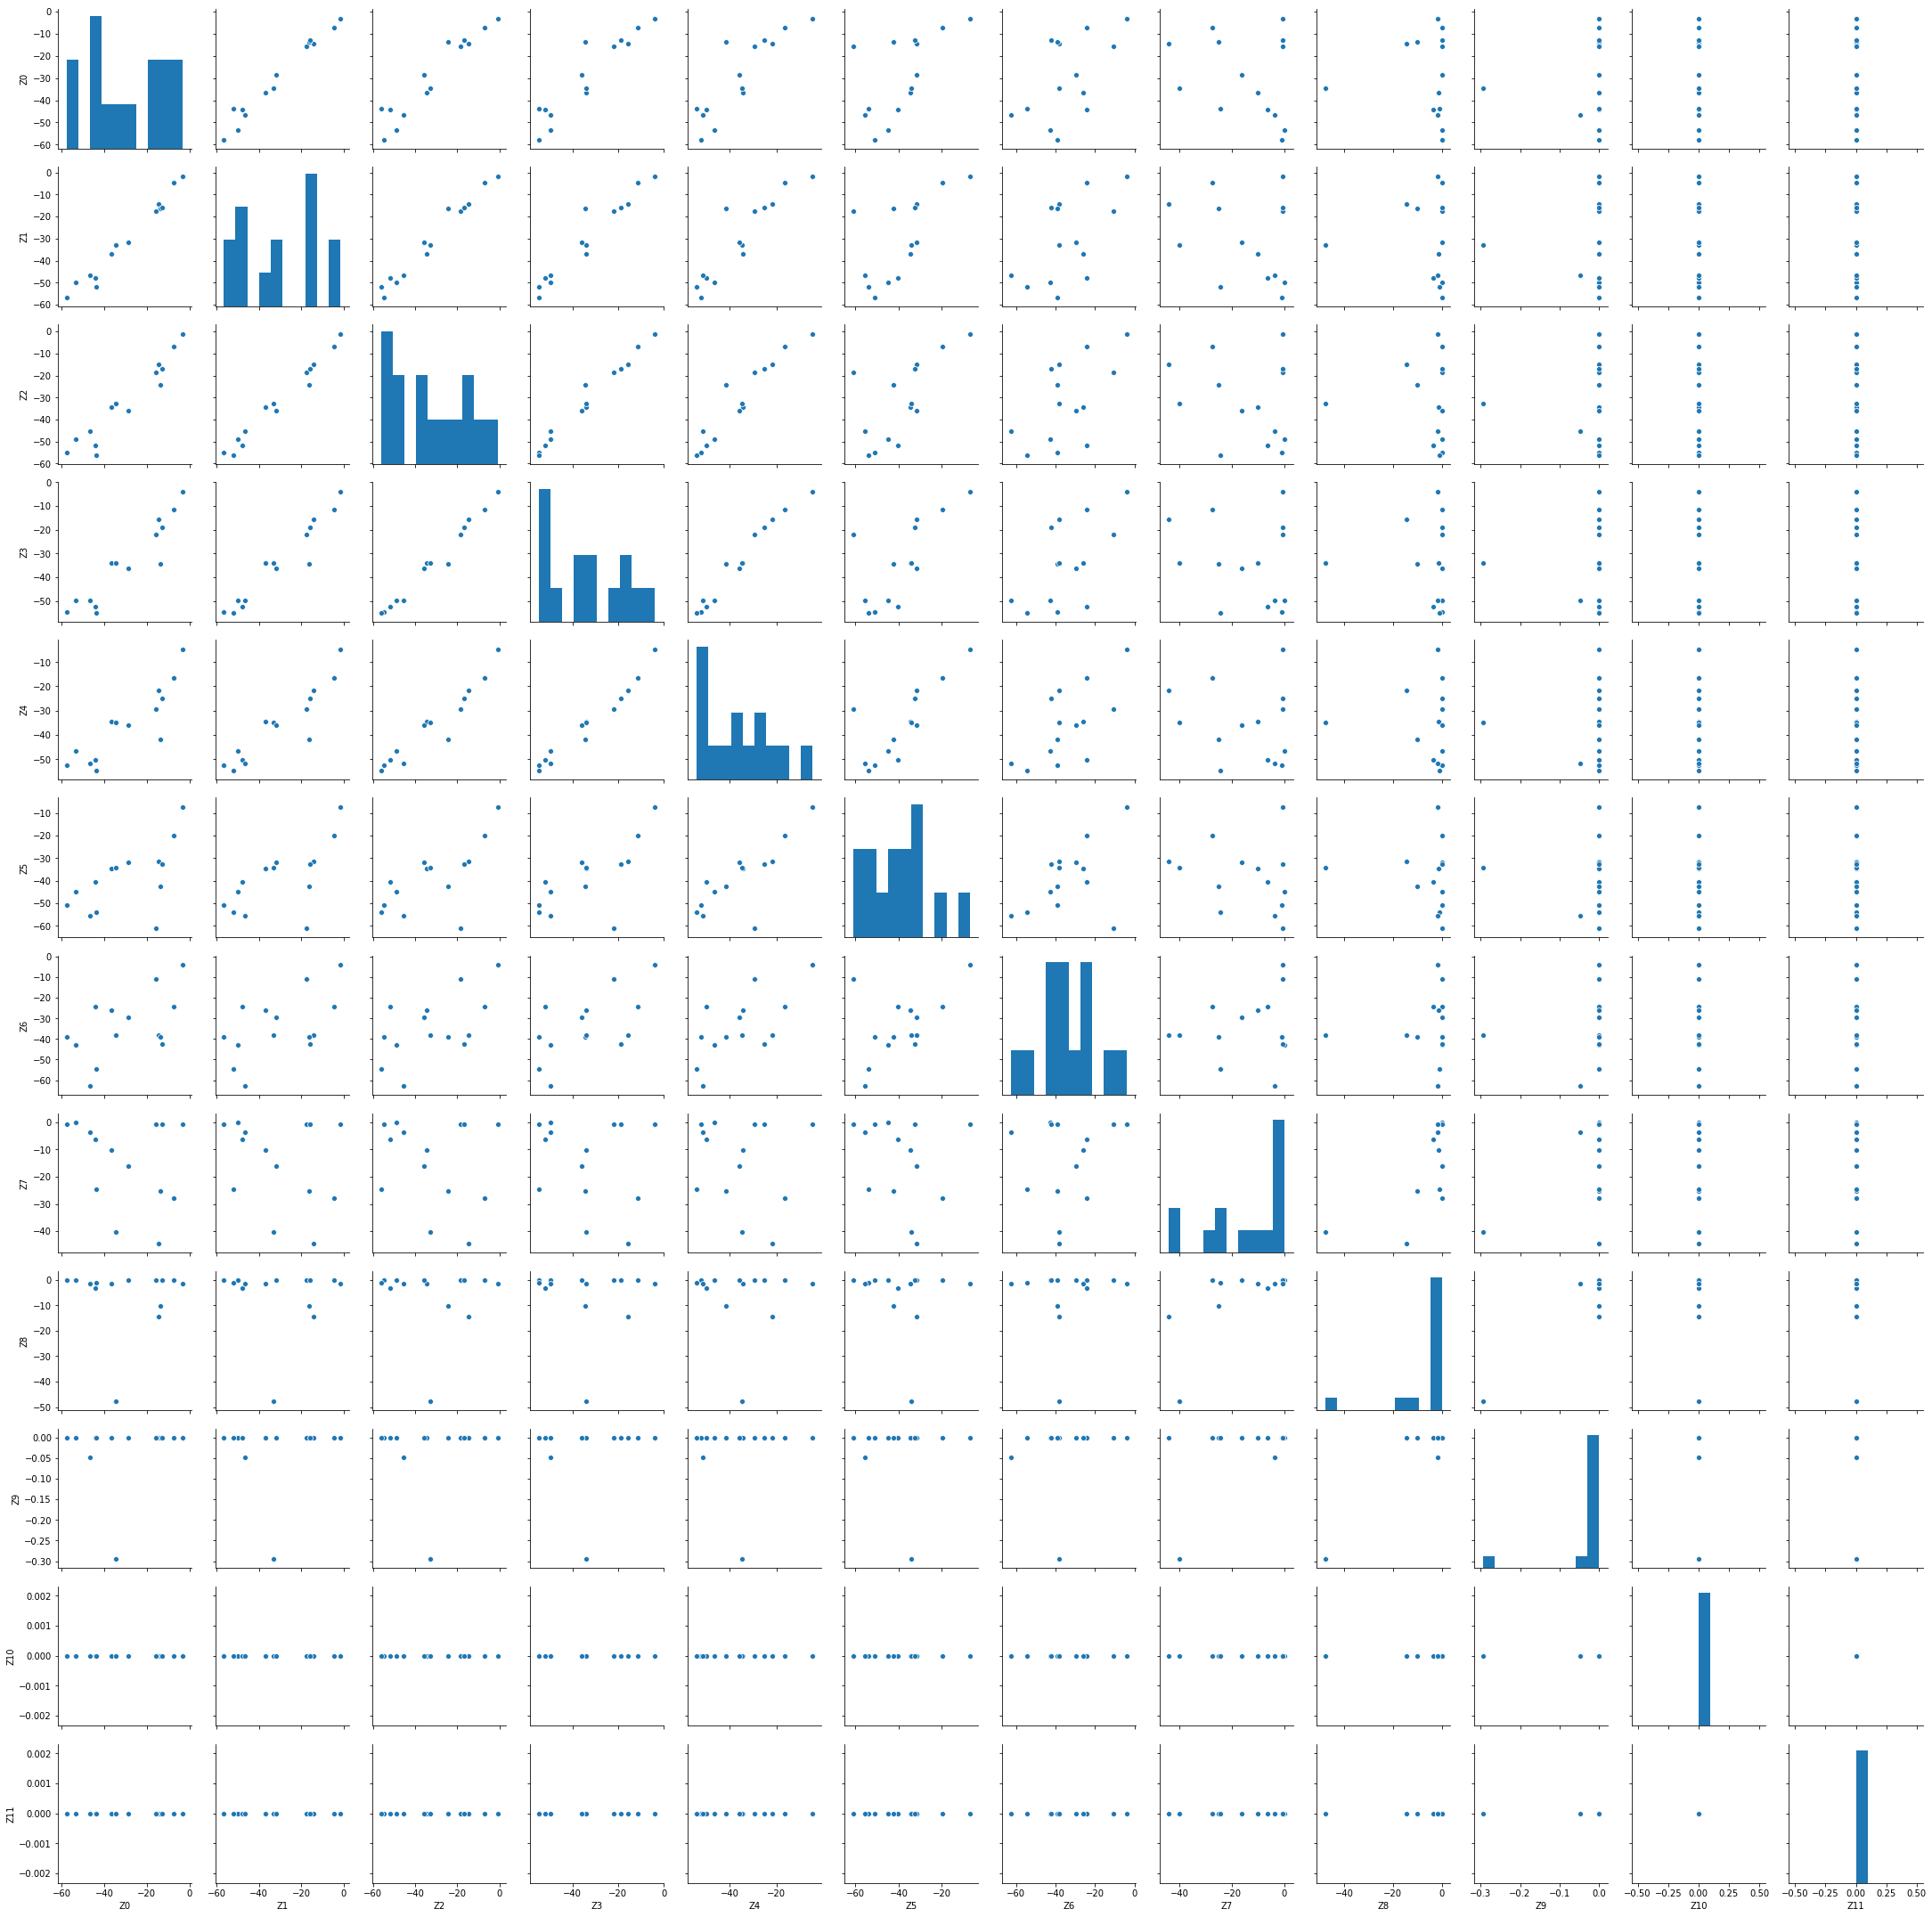

In [114]:
## FOR Class 4, Z column means.

sns.pairplot(df_class4_usermeans_Z, vars = ["Z0", "Z1", "Z2", "Z3", "Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11"], dropna = True)

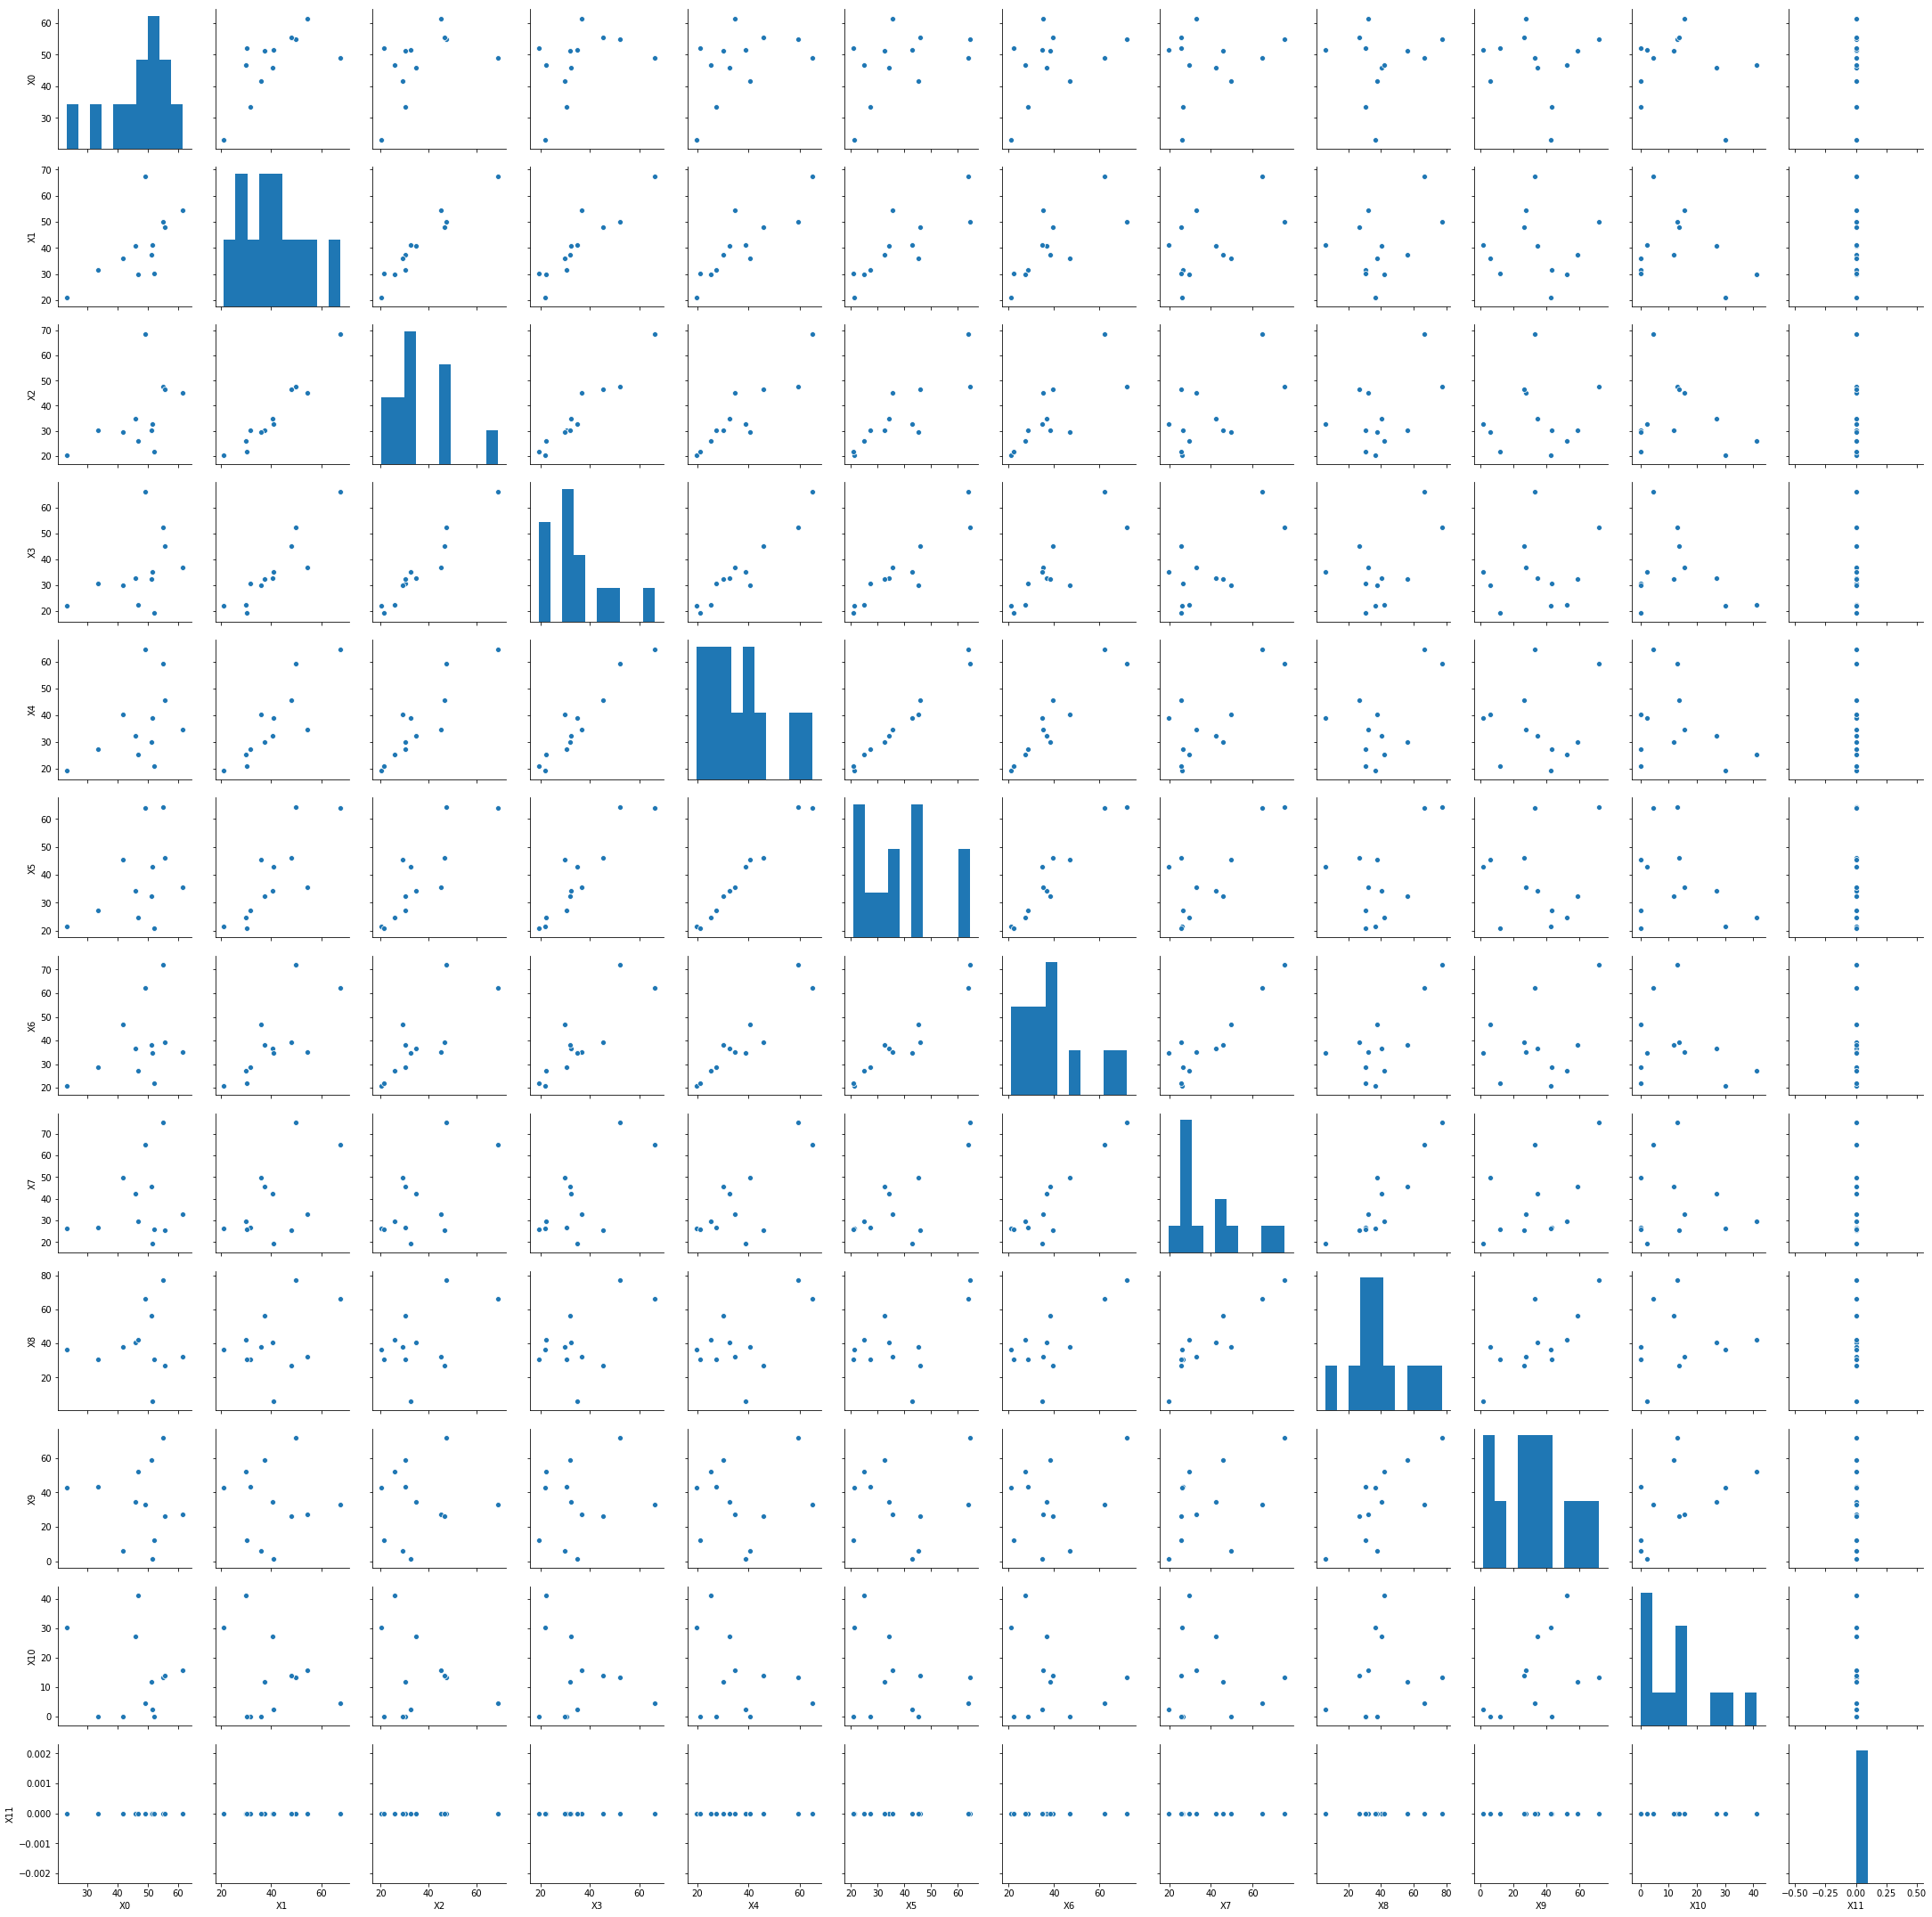

In [115]:
## FOR CLASS 5, X columns

sns.pairplot(df_class5_usermeans_X, vars = ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11"], dropna = True)

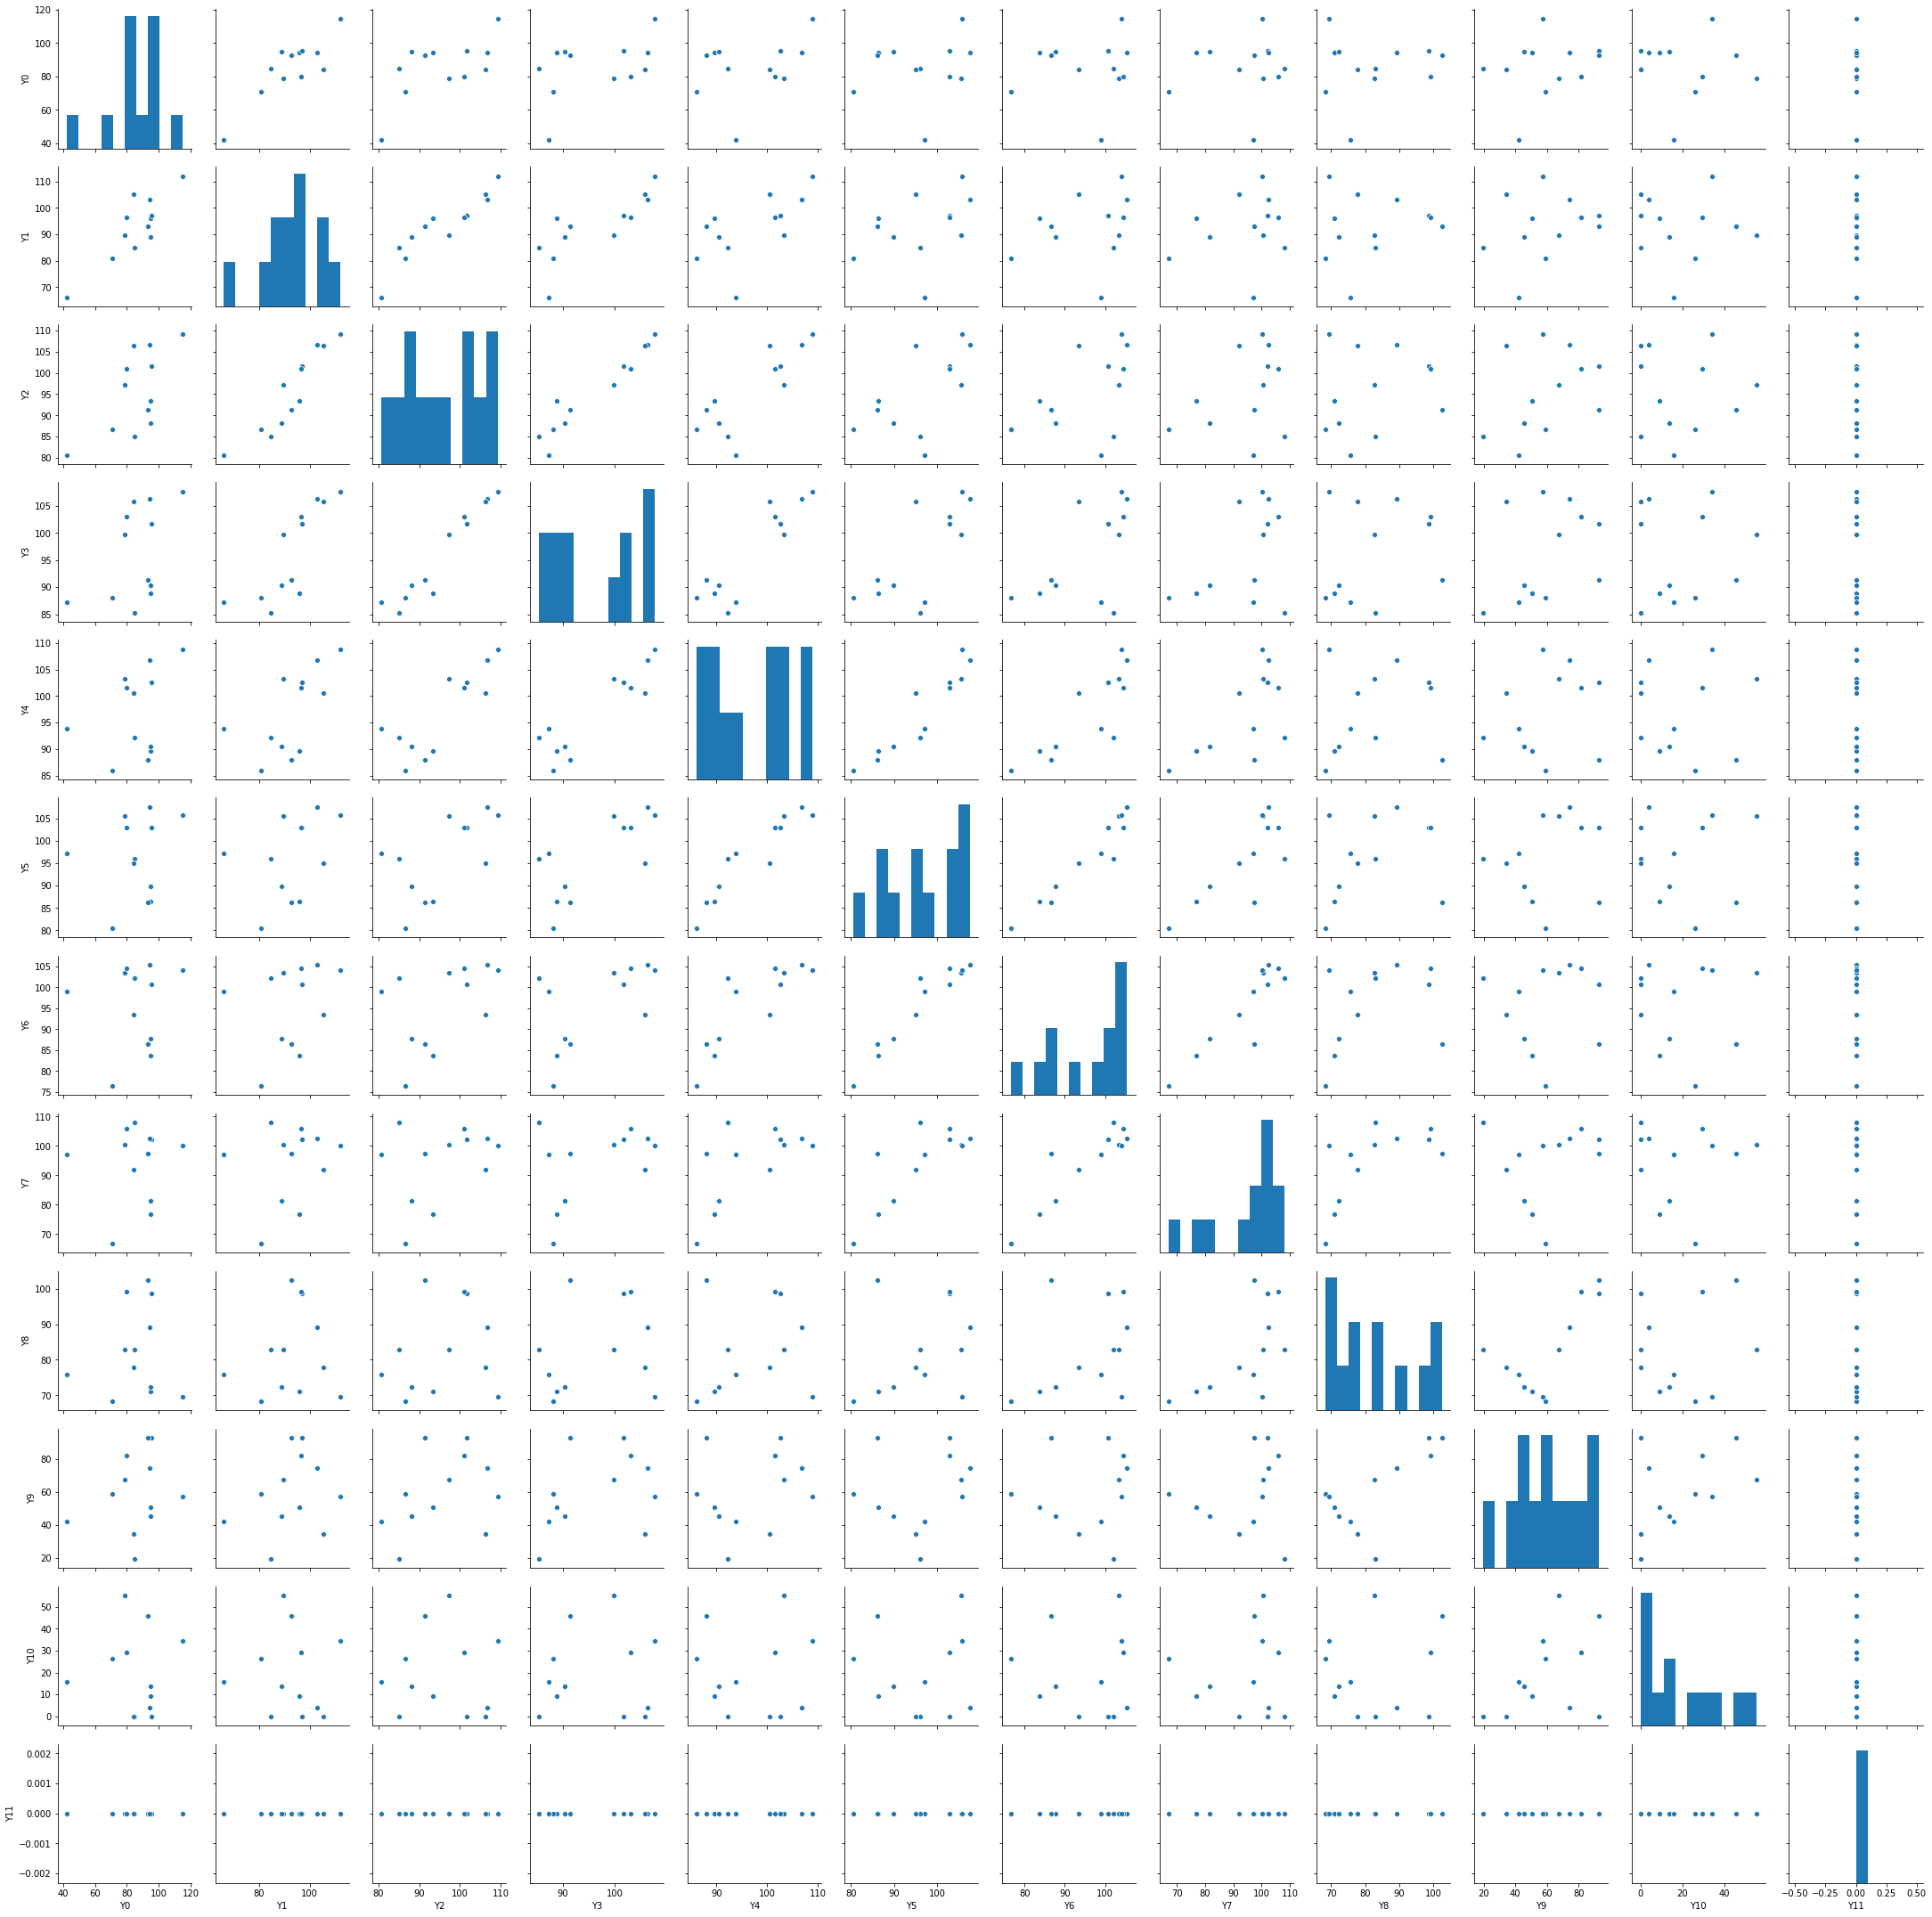

In [116]:
## Pair Plots for Class 5, Y column means.

sns.pairplot(df_class5_usermeans_Y, vars = ["Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11"], dropna = True)

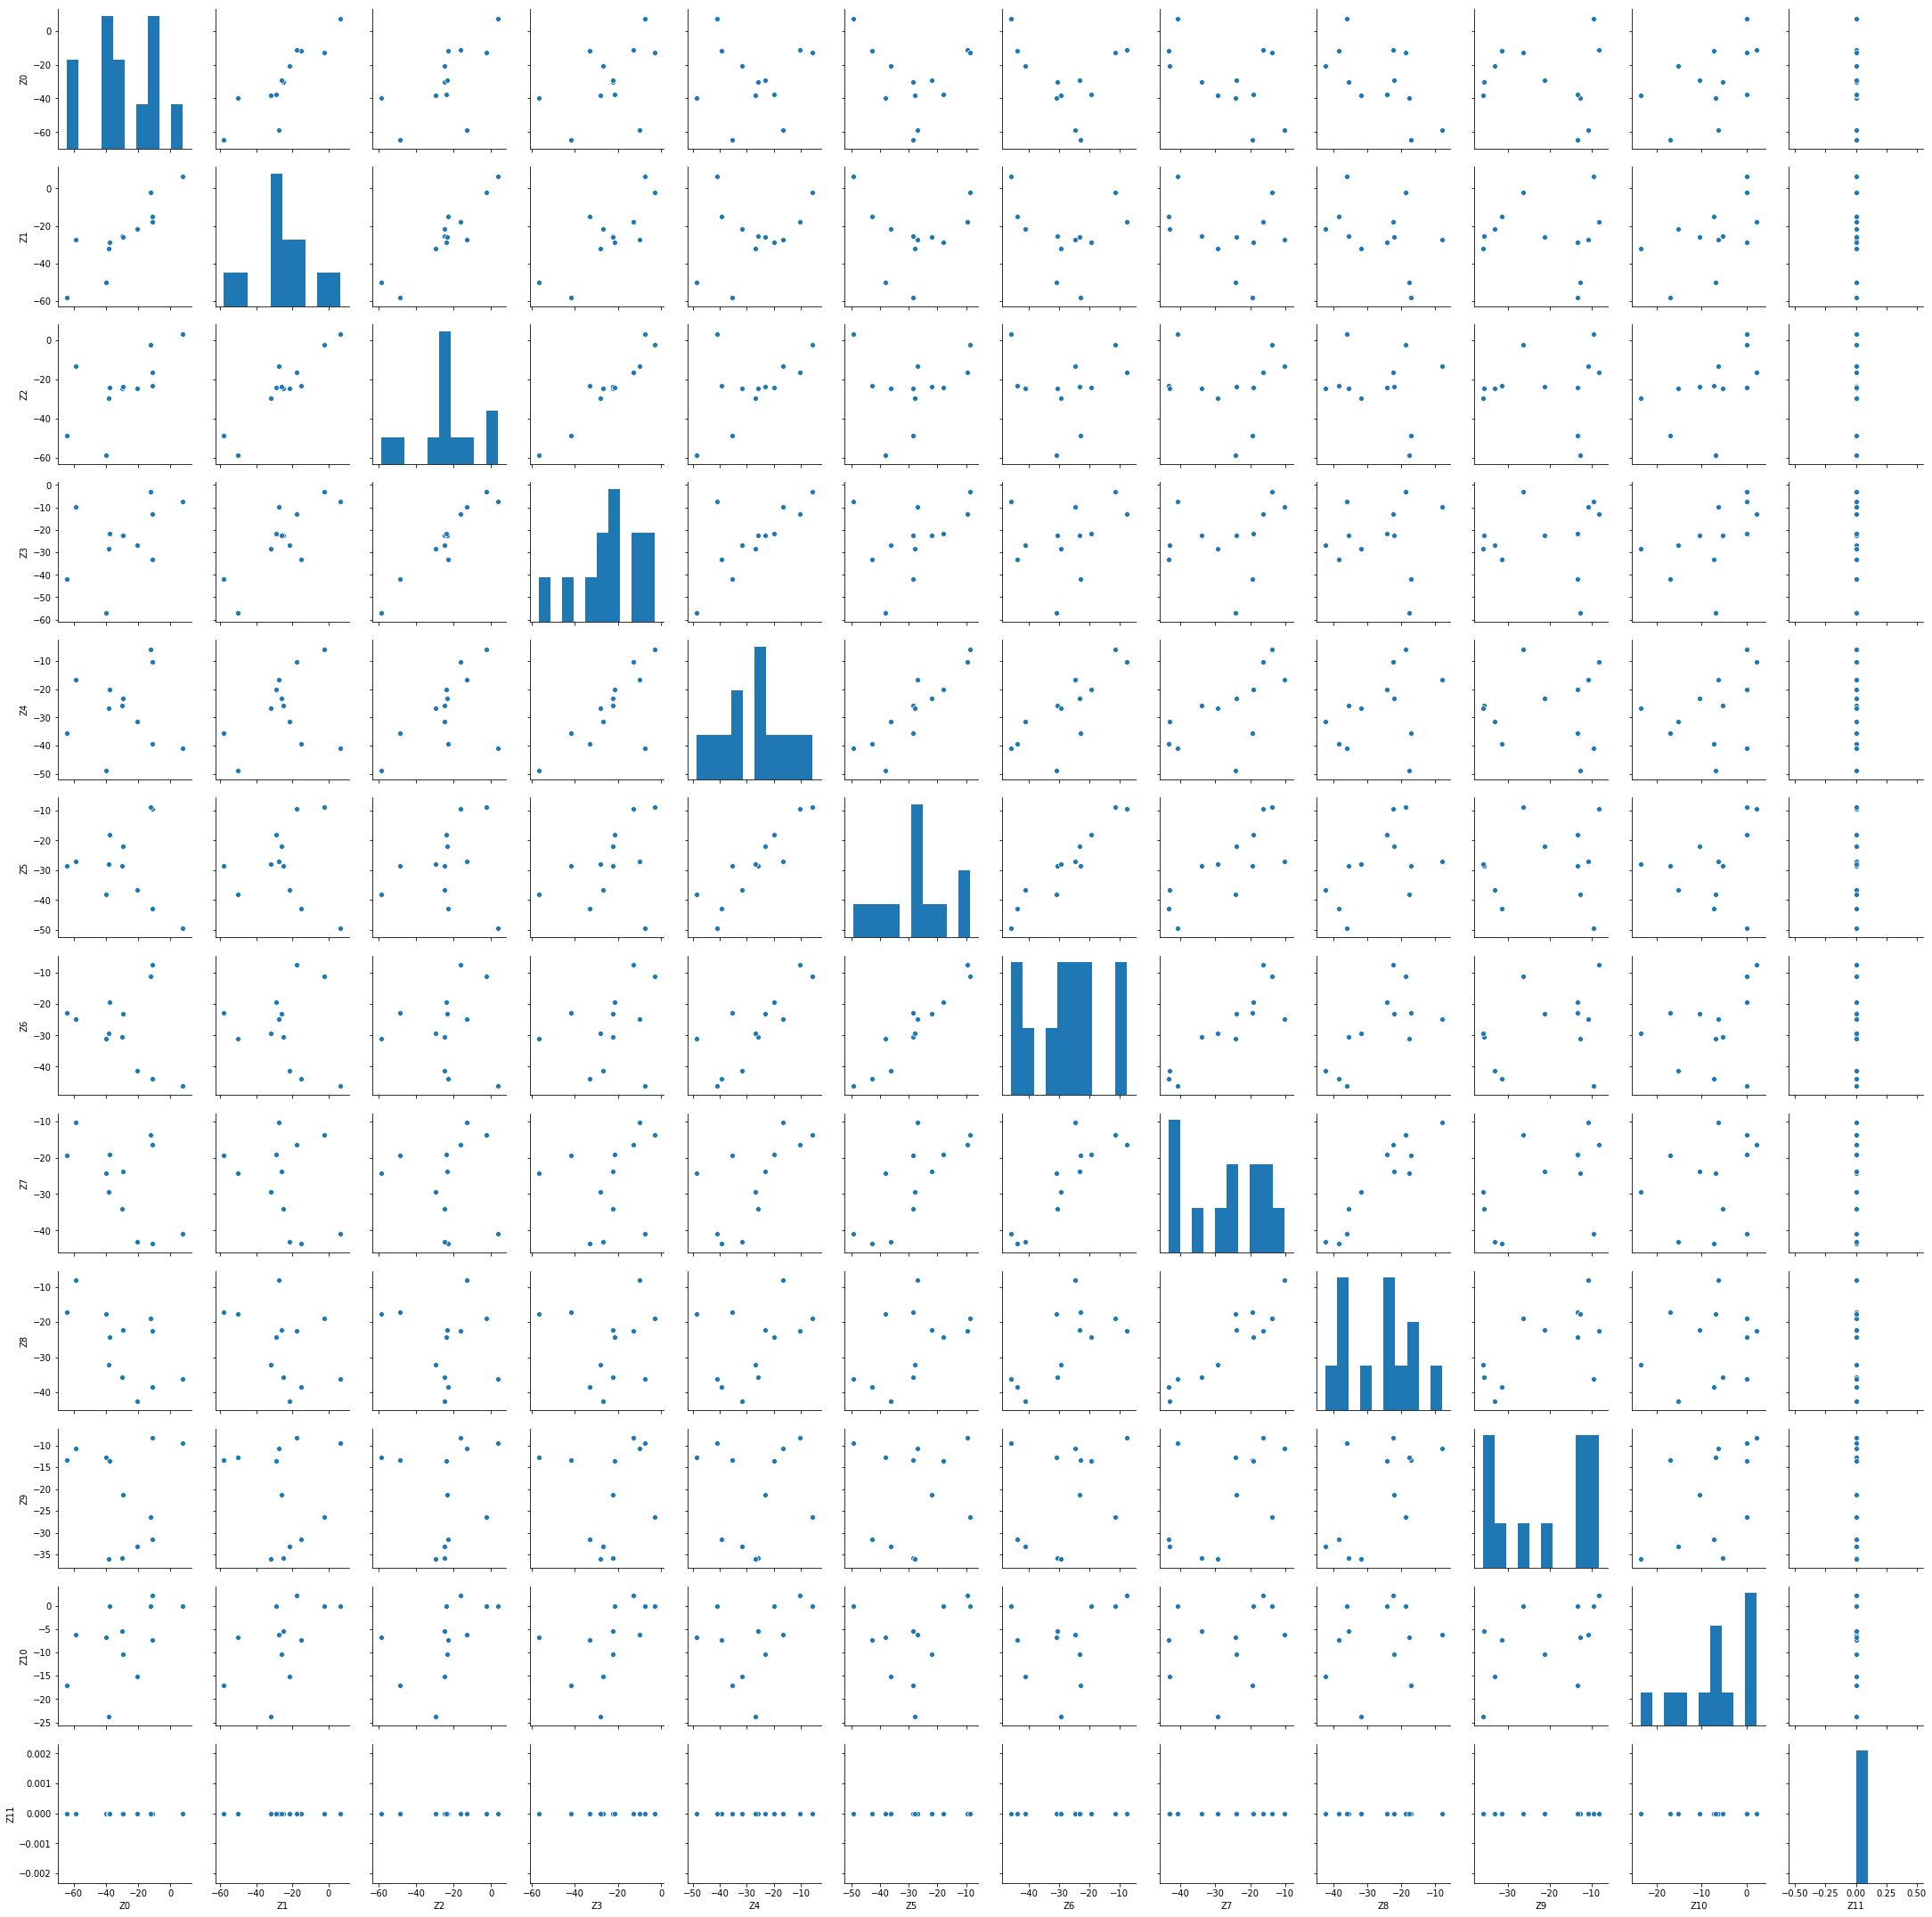

In [117]:
## FOR Class 5, Z column means.

sns.pairplot(df_class5_usermeans_Z, vars = ["Z0", "Z1", "Z2", "Z3", "Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11"], dropna = True)